In [2]:
import os, re, json, shutil, time
import numpy as np
from ase.io import read, write, iread
from ase.io.trajectory import Trajectory
from ase.visualize import view, external
from ase import units
from ase.geometry.analysis import Analysis

from IPython.utils.io import capture_output
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import norm, foldnorm
from tqdm import tqdm

from matplotlib import rc
from matplotlib import gridspec
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

In [3]:
def load_timings(idx, path, n=1, sw='cp2k'):
    #base_dir = "./simulation_{:03d}_{}/"
    all_times = list()

    #pth = base_dir.format(i, sw)
    times, E_tot, E_pot, E_kin = load_energies(path+'energies_000.log')

    timings = np.zeros((n,len(times)))
    iter_times = np.zeros(n)
    n = 0
    m = 0

    with open(path+'timings.txt', 'r') as file:
        for line in file:
            if '.' not in line:
                continue 
            dat = [x for x in line.split(' ') if len(x) > 1]
            lab, tm = str(dat[0]), float(dat[1])

            if lab == 'step':
                timings[m, n] = tm
                n += 1
            elif 'iter' in lab:
                iter_times[m] = tm
                m += 1
                n = 0

        all_times.append(np.concatenate(timings))
        print(timings.mean())
    return np.array(all_times)

def load_energies(path):
    reg_num = re.compile("[-0-9.]+")

    times = list()
    E_tot = list()
    E_pot = list()
    E_kin = list()

    with open(path, 'r') as file:
        print("Header: {}".format(next(file)))        # dumps the header
        for line in file:
            num_data = re.findall(reg_num, line.replace("\n",""))
            for i, lst in enumerate([times, E_tot, E_pot, E_kin]):
                lst.append(float(num_data[i]))
                
    return times, E_tot, E_pot, E_kin

def to_time(number, H=False, M=True, decimals=1):
    hours = "{:02d}h ".format(int(number/3600)) if H else ""
    minutes = "{:02d}m ".format(int((number%3600)/60)) if M else ""
    seconds = str("{:02."+str(decimals)+"f}s").format(number%60)
    
    return hours+minutes+seconds

# **Analysis**

## **Analysis** - energy

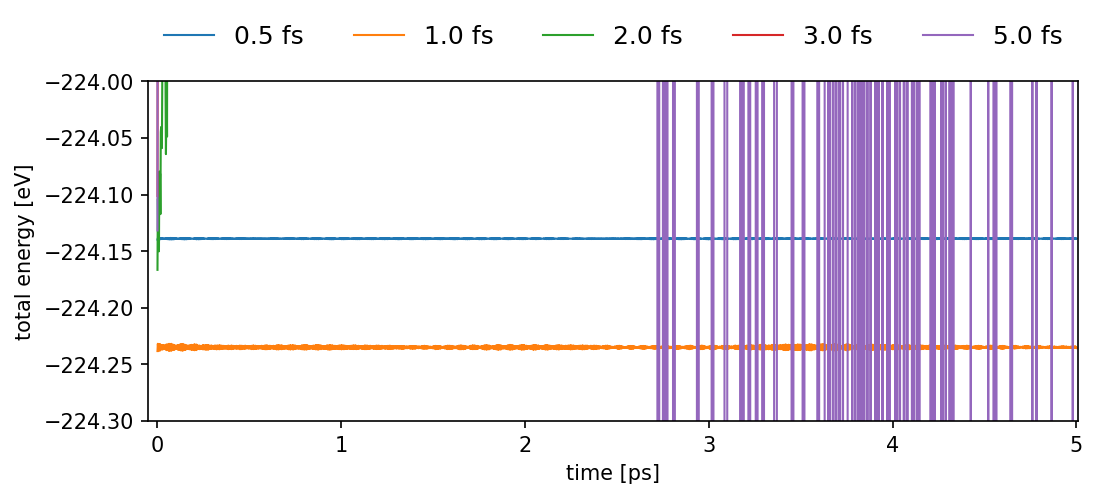

In [30]:
## ready - ok
## multi
plt.figure(figsize=(8,3), dpi=150, facecolor='w')

## [ steps ] , [ dir ids ]
for step, dirid in zip([0.5,1,2,3,5], [14,10,11,12,13]):   # NVE
#for step, dirid in zip([0.5,1,2,3], [18,15,16,17]):         # NVT 300
#for step, dirid in zip([0.5,1,2,3], [22,19,20,21]):        # NVT 77
    E_total = list()
    
    for i in range(5):
        eng_fdir = "./simulation_{:03d}_cp2k/energies_{:03d}.log".format(dirid,i)
        with capture_output() as captured:
            times, E_tot, E_pot, E_kin = load_energies(eng_fdir)
        E_total.append(E_tot)

        #plt.plot(np.array(times), np.array(E_tot), label='E_tot_{:d}'.format(i), linewidth=0.5)
    E_total = np.array(E_total)
    plt.plot(times, E_total.mean(axis=0), linewidth=1, label='{:.1f} fs'.format(step))
    
plt.ylim(-224.3,-224.0)
#plt.ylim(-224.42,-224.3)
plt.xlim(-0.05,5.01)

plt.xlabel("time [ps]")
plt.ylabel("total energy [eV]")
plt.legend(loc='lower center', prop={'size': 12}, frameon=False, bbox_to_anchor=(0.5, 1.03),ncol=5)
plt.show()

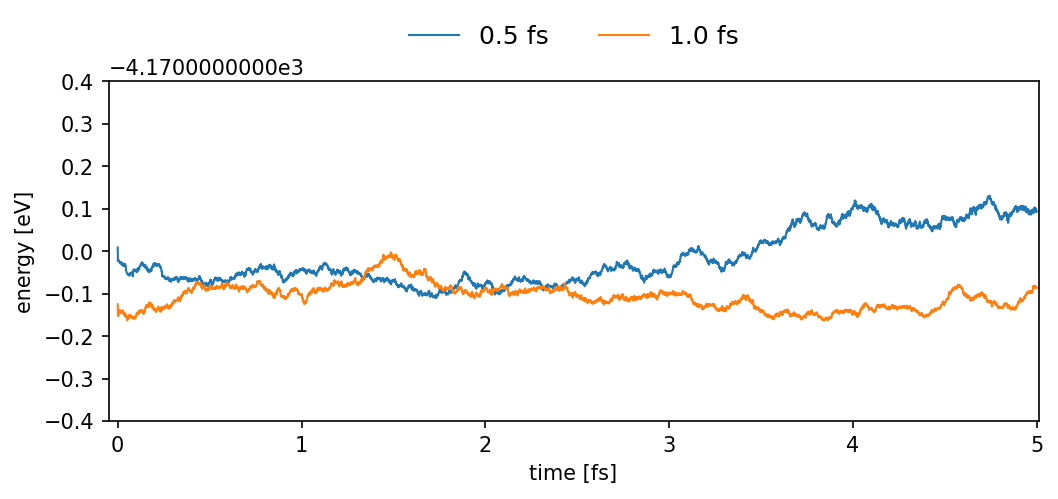

In [229]:
## ready - ok
## multi
plt.figure(figsize=(8,3), dpi=150, facecolor='w')

## [ steps ] , [ dir ids ]
for step, dirid in zip([0.5,1], [24,23]):         # NVT 300 b3lyp psi4
    E_total = list()
    
    for i in range(1):
        eng_fdir = "./simulation_{:03d}_psi4/energies_{:03d}.log".format(dirid,i)
        with capture_output() as captured:
            times, E_tot, E_pot, E_kin = load_energies(eng_fdir)
        E_total.append(E_tot)

    E_total = np.array(E_total)
    plt.plot(times, E_total.mean(axis=0), linewidth=1, label='{:.1f} fs'.format(step))
    
plt.ylim(-4170.4,-4169.6)
plt.xlim(-0.05,5.01)

plt.xlabel("time [fs]")
plt.ylabel("energy [eV]")
plt.legend(loc='lower center', prop={'size': 12}, frameon=False, bbox_to_anchor=(0.5, 1.03),ncol=5)
plt.show()

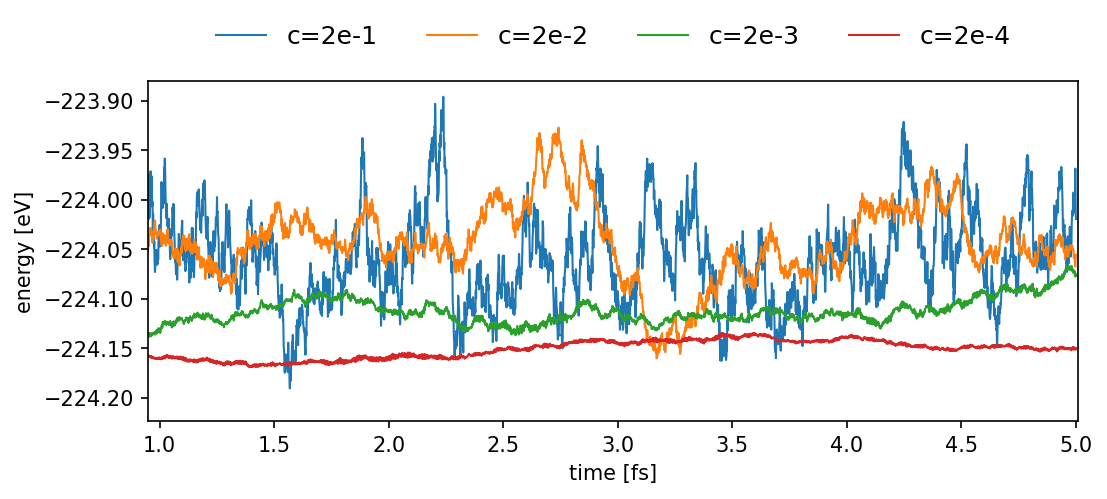

In [231]:
## ready - ok
## multi
plt.figure(figsize=(8,3), dpi=150, facecolor='w')

## [ steps ] , [ dir ids ]
for step, dirid in zip([-1, -2, -3, -4], [26,27,15,28]):         # NVT 300 dftb cp2k - friction coeff
    E_total = list()
    
    for i in range(5):
        eng_fdir = "./simulation_{:03d}_cp2k/energies_{:03d}.log".format(dirid,i)
        with capture_output() as captured:
            times, E_tot, E_pot, E_kin = load_energies(eng_fdir)
        E_total.append(E_tot)

        #plt.plot(np.array(times), np.array(E_tot), label='E_tot_{:d}'.format(i), linewidth=0.5)
    E_total = np.array(E_total)
    plt.plot(times, E_total.mean(axis=0), linewidth=1, label='c=2e{:d}'.format(step))
    
#plt.ylim(-4170.4,-4169.6)
plt.xlim(0.95,5.01)

plt.xlabel("time [fs]")
plt.ylabel("energy [eV]")
plt.legend(loc='lower center', prop={'size': 12}, frameon=False, bbox_to_anchor=(0.5, 1.03),ncol=5)
plt.show()

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

10.728801839632075
Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

6.573933413317337
Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

4.023549690061988
Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

1.0871573685262947


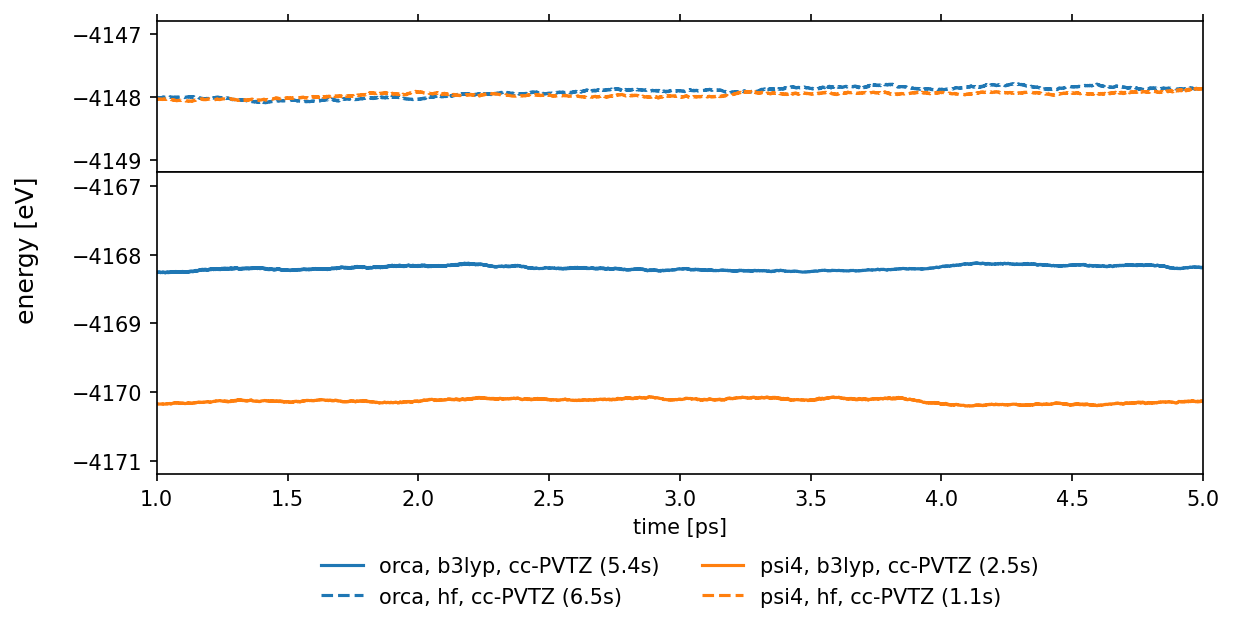

<Figure size 1050x750 with 0 Axes>

In [281]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

fig, ax = plt.subplots(num=None, figsize=(9,4), dpi=150, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,2], figure=fig, wspace=0.0, hspace=0.0,) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharex=ax0)

plt.figure(figsize=(7,5), dpi=150)
basis = 'cc-PVTZ'

for sw, indices in zip(['orca','psi4'], [[25,29], [31,30]]):
    clr = {}
    
    for method, index in zip(['b3lyp','hf'], indices):
        dpath = "./simulation_{:03d}_{}/".format(index, sw)
        
        for i in range(1):
            fpath = dpath + "energies_{:03d}.log".format(i)
            with capture_output() as captured:
                times, E_tot, E_pot, E_kin = load_energies(fpath)
                
            timings = load_timings(index, dpath, sw=sw)
            
            ax1.plot(times, E_tot, label='{}, {}, {} ({})'.format(sw, method, basis, to_time(np.median(timings), M=False) ), **clr)
            line = ax0.plot(times, E_tot, label='{}, {}, {} ({})'.format(sw, method, basis, to_time(np.median(timings), M=False) ), **clr)
            clr = {'color':line[0].get_color(), 'linestyle':'dashed'}

ax0.xaxis.tick_top()
plt.setp(ax1.get_yticklabels()[-1], visible=False) 
plt.setp(ax0.get_xticklabels(), visible=False) 
plt.subplots_adjust(hspace=0, wspace=0.0)

ax0.set_ylim(-4149.2,-4146.8)
ax1.set_ylim(-4171.2,-4166.8)
ax1.set_xlim(1,5)
ax1.set_xlabel("time [ps]")
fig.supylabel("energy [eV]")
ax1.legend(loc='lower center', bbox_to_anchor=(0.5,-0.5), ncol=2, frameon=False)
plt.show()

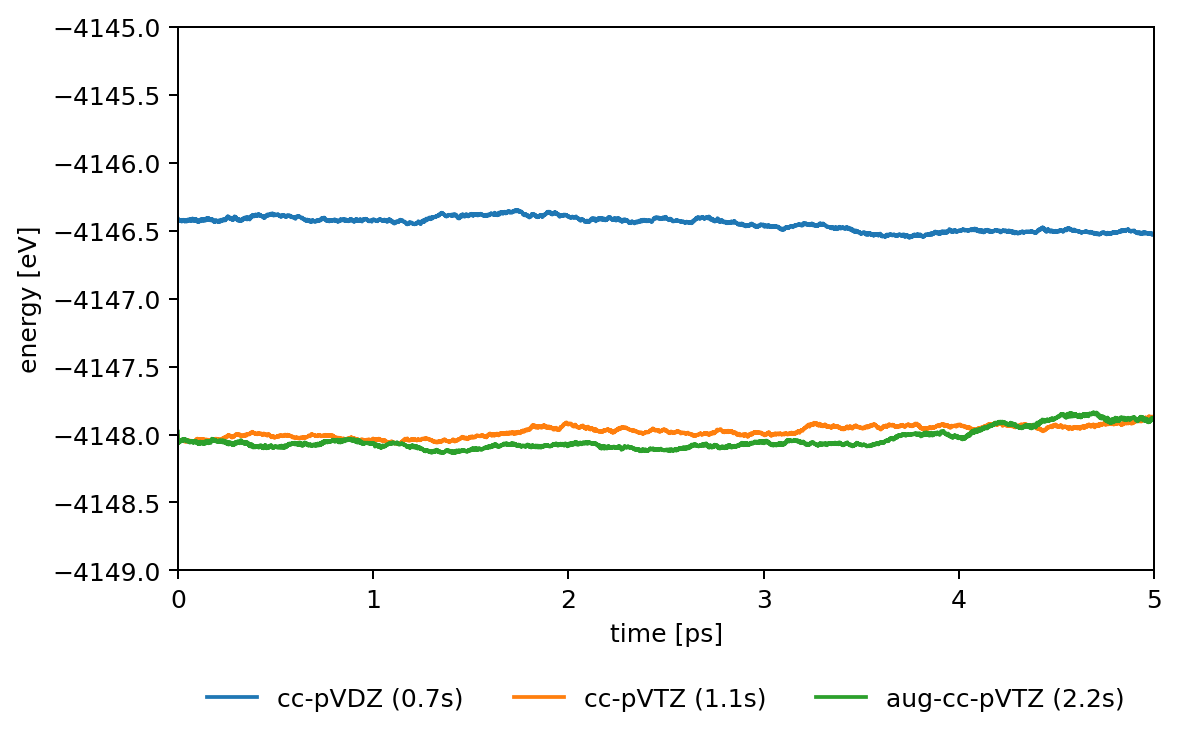

In [8]:
## HF + Psi4 - various basis sets
sw = 'psi4'
meth = ['cc-pVDZ', 'cc-pVTZ', 'aug-cc-pVTZ']
indices = [33, 30, 35]

dpath = "./simulation_{:03d}_{}/"

plt.figure(figsize=(7,4), dpi=180, facecolor='w')

for i, met in zip(indices, meth):
    fpath = dpath.format(i, sw) + "energies_000.log"
    with capture_output() as captured:
        times, E_tot, E_pot, E_kin = load_energies(fpath)
        timings = load_timings(i, dpath.format(i, sw), sw=sw)
    
    plt.plot(times, E_tot, label='{} ({})'.format(met, to_time(np.median(timings), H=False, M=False)) )

plt.xlim(0,5)
plt.ylim(-4149, -4145)
plt.xlabel('time [ps]')
plt.ylabel('energy [eV]')
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.3), ncol=3, frameon=False)
plt.show()

./simulation_034_psi4/energies_000.log
./simulation_023_psi4/energies_000.log
./simulation_036_psi4/energies_000.log


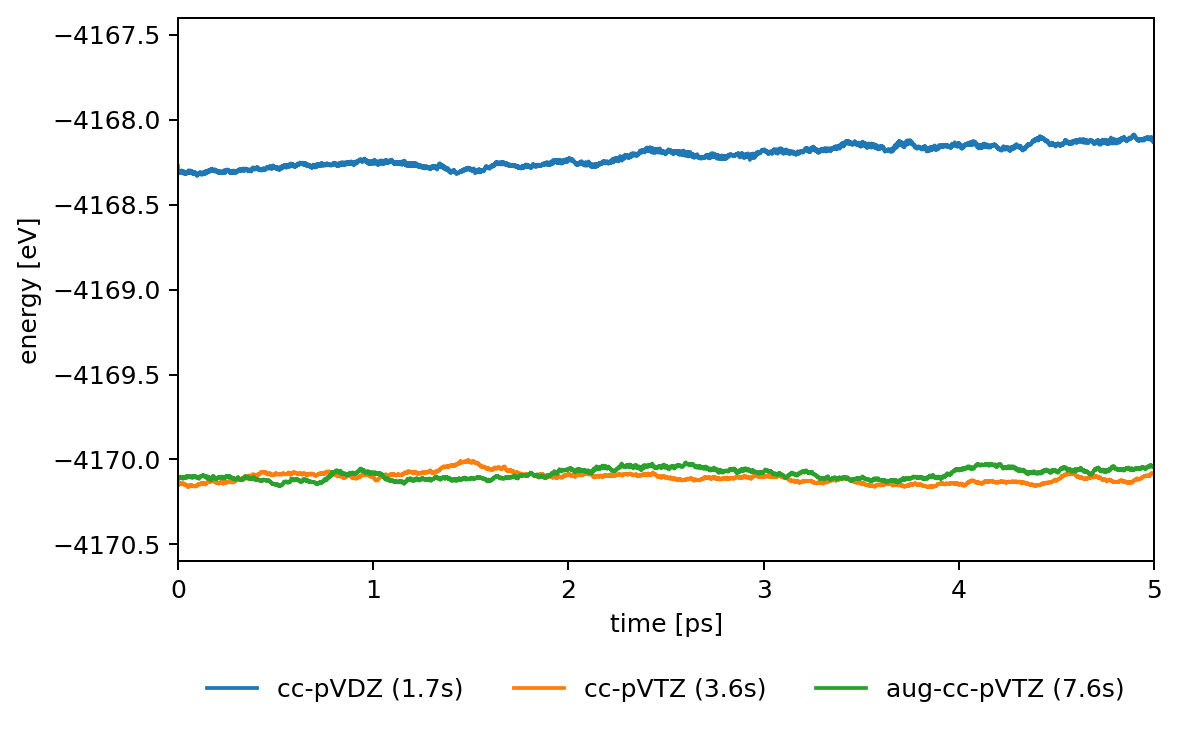

In [28]:
## B3LYP + Psi4 - various basis sets
sw = 'psi4'
meth = ['cc-pVDZ', 'cc-pVTZ', 'aug-cc-pVTZ']
indices = [34, 23, 36]

dpath = "./simulation_{:03d}_{}/"

plt.figure(figsize=(7,4), dpi=180, facecolor='w')

for i, met in zip(indices, meth):
    fpath = dpath.format(i, sw) + "energies_000.log"
    print(fpath)
    with capture_output() as captured:
        times, E_tot, E_pot, E_kin = load_energies(fpath)
        timings = load_timings(i, dpath.format(i, sw), sw=sw)
    
    plt.plot(times, E_tot, label='{} ({})'.format(met, to_time(np.median(timings), H=False, M=False)) )

plt.ylim(-4170.6, -4167.4)
plt.xlim(0,5)    
plt.xlabel('time [ps]')
plt.ylabel('energy [eV]')
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.3), ncol=3, frameon=False)
plt.show()


## **Analysis** - ase

### Introduction of a relative molecular frame of view with respect to O-H-O

In [28]:
ana_dir = "./simulation_028_cp2k/"
oxygen_ids = [0, 3]
shared_H_id = 4

In [29]:
def center_atom_pair(frame, pos1, pos2, center):
    d_center = center - (pos1 + (pos2 - pos1)/2)
    frame.translate(d_center)

In [35]:
## single file
new_traj = Trajectory(ana_dir + 'coords_transformed.traj', 'w')

times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies.log")

ird = iread(ana_dir + "coords.traj", index=':')

for frame in ird:
    cell_center = frame.get_cell().sum(axis=0) / 2
    pos1, pos2 = frame.get_positions()[oxygen_ids]
    
    center_atom_pair(frame, pos1, pos2, cell_center)
    frame.rotate(pos2 - pos1, [1,0,0], center=cell_center )   # orient oxygen pair in x-axis direction
    
    shared_H_pos = frame.get_positions()[shared_H_id]
    frame.rotate((shared_H_pos - cell_center)*np.array([0,1,1]), [0,0,1], center=cell_center)   # restrict shared H movement to x-z  plane only  
    
    new_traj.write(frame)
    
write(ana_dir + "coords_transformed.xyz", read(ana_dir + "coords_transformed.traj", index=':'), format="xyz")

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



In [30]:
## multi file
for i in range(5):
    new_traj = Trajectory(ana_dir + 'coords_transformed_{:03d}.traj'.format(i), 'w')

    times, E_tot, E_pot, E_kin = load_energies(ana_dir+'energies_{:03d}.log'.format(i))

    ird = iread(ana_dir + "coords_{:03d}.traj".format(i), index=':')

    for frame in ird:
        cell_center = frame.get_cell().sum(axis=0) / 2
        pos1, pos2 = frame.get_positions()[oxygen_ids]

        center_atom_pair(frame, pos1, pos2, cell_center)
        frame.rotate(pos2 - pos1, [1,0,0], center=cell_center )   # orient oxygen pair in x-axis direction

        shared_H_pos = frame.get_positions()[shared_H_id]
        frame.rotate((shared_H_pos - cell_center)*np.array([0,1,1]), [0,0,1], center=cell_center)   # restrict shared H movement to x-z  plane only  

        new_traj.write(frame)

    write(ana_dir + "coords_transformed_{:03d}.xyz".format(i), read(ana_dir + "coords_transformed_{:03d}.traj".format(i), index=':'), format="xyz")

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



### Analysis of O-H-O bonds - single

In [10]:
ana_dir = "./simulation_023_psi4/"

In [11]:
suffix = "_000"
times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies{}.log".format(suffix))
oxygen_ids = [0, 3]
shared_H_id = 4

ird = iread(ana_dir + "coords_transformed{}.traj".format(suffix), index=':')

bond_OO = np.zeros(len(times))
bond_cH = np.zeros(len(times))
angle_OHO = np.zeros(len(times))

for i, frame in enumerate(ird):
    cell_center = frame.get_cell().sum(axis=0) / 2
    ox1, ox2 = frame.get_positions()[oxygen_ids]
    hydr = frame.get_positions()[shared_H_id]
    
    d_ox = np.sqrt(((ox2 - ox1)**2).sum())
    d_cH = np.sqrt(((hydr - cell_center)**2).sum())
    
    vec1 = ox1 - hydr
    vec2 = ox2 - hydr
    normal = lambda v: v / np.linalg.norm(v)
    angle = np.arccos(np.dot(normal(vec1), normal(vec2)))
    
    bond_OO[i] = d_ox
    bond_cH[i] = d_cH
    angle_OHO[i] = angle

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



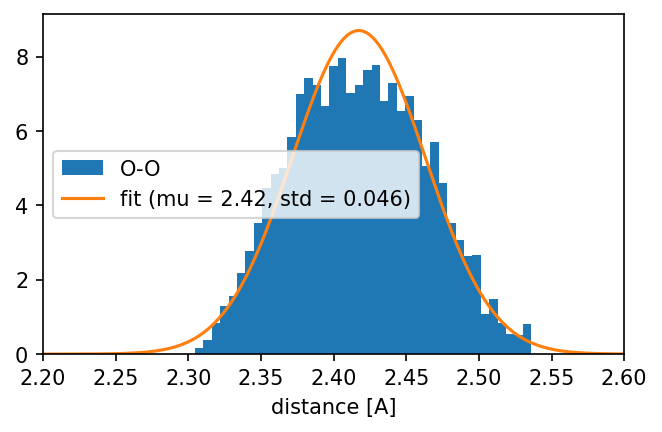

In [12]:
mu, std = norm.fit(bond_OO)
xdat = np.linspace(2.2,2.6,200)
ydat = norm.pdf(xdat, mu, std)

plt.figure(figsize=(5,3), dpi=150)
plt.hist(bond_OO, bins=40, label='O-O',density=True)
plt.plot(xdat, ydat, label="fit (mu = {:.2f}, std = {:.3f})".format(mu, std))
plt.xlim(2.2,2.6)
plt.xlabel("distance [A]")
plt.ylabel("")
plt.legend()


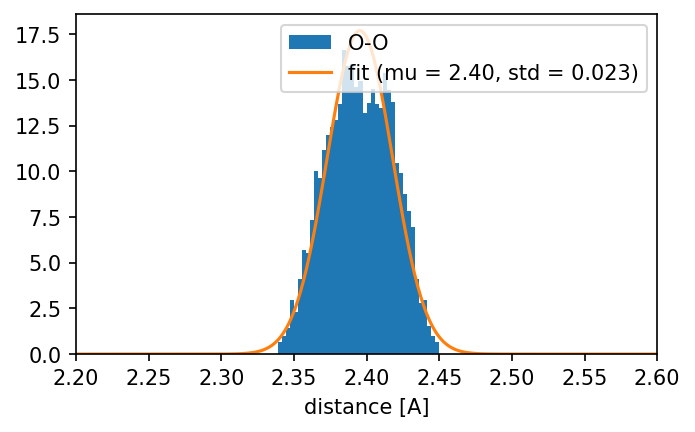

In [9]:
mu, std = norm.fit(bond_OO)
xdat = np.linspace(2.2,2.6,200)
ydat = norm.pdf(xdat, mu, std)

plt.figure(figsize=(5,3), dpi=150)
plt.hist(bond_OO, bins=40, label='O-O',density=True)
plt.plot(xdat, ydat, label="fit (mu = {:.2f}, std = {:.3f})".format(mu, std))
plt.xlim(2.2,2.6)
plt.xlabel("distance [A]")
plt.ylabel("")
plt.legend()


### Analysis of O-H-O bonds - multi

In [6]:
ana_dir = "./simulation_010_cp2k/"

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



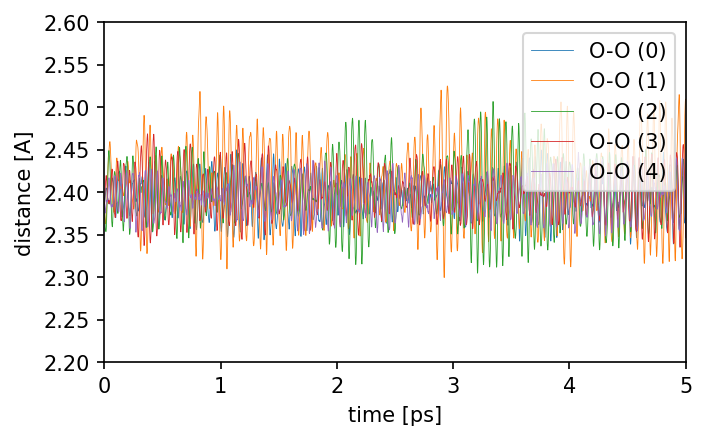

In [11]:
plt.figure(figsize=(5,3), dpi=150)
bonds_oo = list()
bonds_ch = list()

for i in range(5):
    times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_{:03d}.log".format(i))
    oxygen_ids = [0, 3]
    shared_H_id = 4

    ird = iread(ana_dir + "coords_transformed_{:03d}.traj".format(i), index=':')

    bond_OO = np.zeros(len(times))
    bond_cH = np.zeros(len(times))

    for f, frame in enumerate(ird):
        cell_center = frame.get_cell().sum(axis=0) / 2
        ox1, ox2 = frame.get_positions()[oxygen_ids]

        d_ox = np.sqrt(((ox2 - ox1)**2).sum())
        d_cH = np.sqrt(((frame.get_positions()[shared_H_id] - cell_center)**2).sum())

        bond_OO[f] = d_ox
        bond_cH[f] = d_cH
    
    plt.plot(times, bond_OO * units.Ang, label='O-O ({})'.format(i), linewidth=0.4)
        
plt.ylim(2.2,2.6)
plt.xlim(0,5)
plt.xlabel("time [ps]")
plt.ylabel("distance [A]")
plt.legend()
plt.show()

In [21]:
ana_dir = "./simulation_010_cp2k/"

bonds_oo = list()
bonds_ch = list()

for i in range(5):
    times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_{:03d}.log".format(i))
    oxygen_ids = [0, 3]
    shared_H_id = 4

    ird = iread(ana_dir + "coords_transformed_{:03d}.traj".format(i), index=':')

    bond_OO = np.zeros(len(times))
    bond_cH = np.zeros(len(times))

    for f, frame in enumerate(ird):
        cell_center = frame.get_cell().sum(axis=0) / 2
        ox1, ox2 = frame.get_positions()[oxygen_ids]

        d_ox = np.sqrt(((ox2 - ox1)**2).sum())
        d_cH = np.sqrt(((frame.get_positions()[shared_H_id] - cell_center)**2).sum())

        bond_OO[f] = d_ox
        bond_cH[f] = d_cH
        
    bonds_oo.append(bond_OO)
    bonds_ch.append(bond_cH)
    
    #plt.plot(times, bond_OO * units.Ang, label='O-O ({})'.format(i), linewidth=0.4)

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



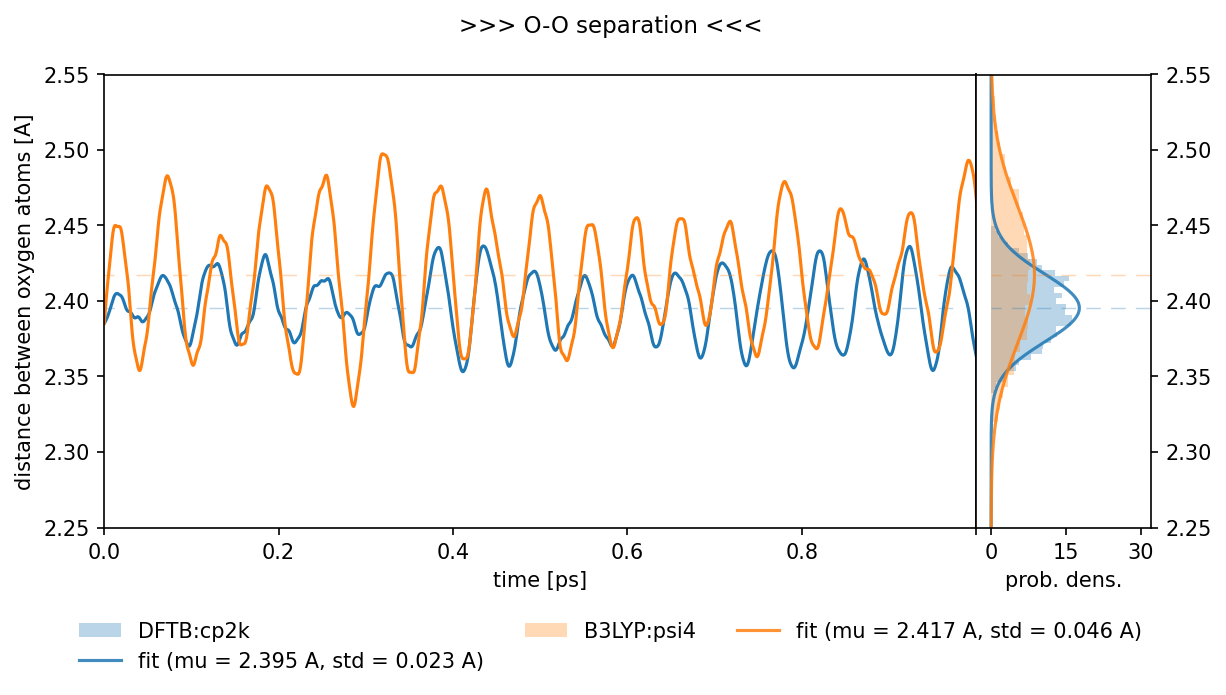

In [30]:
from matplotlib import rc
from matplotlib import gridspec

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

fig, ax = plt.subplots(num=None, figsize=(9,4), dpi=150, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[10,2], figure=fig) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)

for name, dirid in zip(['DFTB','B3LYP'], [10,23]):
    if name == 'DFTB':
        program = 'cp2k'
    else:
        program = 'psi4'
        
    ana_dir = "./simulation_{:03d}_{}/".format(dirid,program)
    
    bonds_oo = list()
    bonds_ch = list()
    angles = list()

    for i in range(1):
        times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_{:03d}.log".format(i))
        oxygen_ids = [0, 3]
        shared_H_id = 4

        ird = iread(ana_dir + "coords_transformed_{:03d}.traj".format(i), index=':')

        bond_OO = np.zeros(len(times))
        bond_cH = np.zeros(len(times))
        angle_OHO = np.zeros(len(times))

        for f, frame in enumerate(ird):
            cell_center = frame.get_cell().sum(axis=0) / 2
            ox1, ox2 = frame.get_positions()[oxygen_ids]
            hydr = frame.get_positions()[shared_H_id]

            d_ox = np.sqrt(((ox2 - ox1)**2).sum())
            d_cH = np.sqrt(((hydr - cell_center)**2).sum())

            vec1 = ox1 - hydr
            vec2 = ox2 - hydr
            normal = lambda v: v / np.linalg.norm(v)
            angle = np.arccos(np.dot(normal(vec1), normal(vec2)))
            
            bond_OO[f] = d_ox
            bond_cH[f] = d_cH
            angle_OHO[f] = angle
             
    bonds_oo.append(bond_OO)
    bonds_ch.append(bond_cH)
    angles.append(angle_OHO)

    boo = np.array(bonds_oo)
    bch = np.array(bonds_ch)
    ang = np.array(angles)

    #ax0.fill_between(times, boo.max(axis=0), boo.min(axis=0), alpha=0.4)
    line = ax0.plot(times, boo.mean(axis=0))

    mu, std = norm.fit(boo.mean(axis=0))
    ydat = np.linspace(2.25,2.55,200)
    xdat = norm.pdf(ydat, mu, std)

    ax1.hist(boo.mean(axis=0), bins=30, label="{}:{}".format(name,program),density=True, orientation='horizontal',alpha=0.3, color=line[0].get_color())
    ax1.plot(xdat, ydat, label="fit (mu = {:.3f} A, std = {:.3f} A)".format(mu, std), linewidth=1.5, alpha=0.85, color=line[0].get_color())

    ax0.plot([0,5], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,15)), linewidth=0.7, alpha=0.3)
    ax1.plot([0,35], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,7)), linewidth=0.7, alpha=0.3)

ax0.set_ylim(2.25,2.55)
ax0.set_xlim(0,1)
ax0.set_xlabel("time [ps]")
ax0.set_ylabel("distance between oxygen atoms [A]")

ax1.set_xlim(-3,32)
ax1.set_xticks([0,15,30])
ax1.set_xlabel("prob. dens.")
ax1.yaxis.tick_right()

plt.setp(ax0.get_xticklabels()[-1], visible=False)
plt.subplots_adjust(hspace=.0, wspace=0.0)

plt.suptitle('>>> '+'O-O separation'+' <<<', fontsize=11)

fig.legend(loc='upper center', prop={'size': 10}, frameon=False, bbox_to_anchor=(0.5, 0),ncol=3)
plt.show()

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



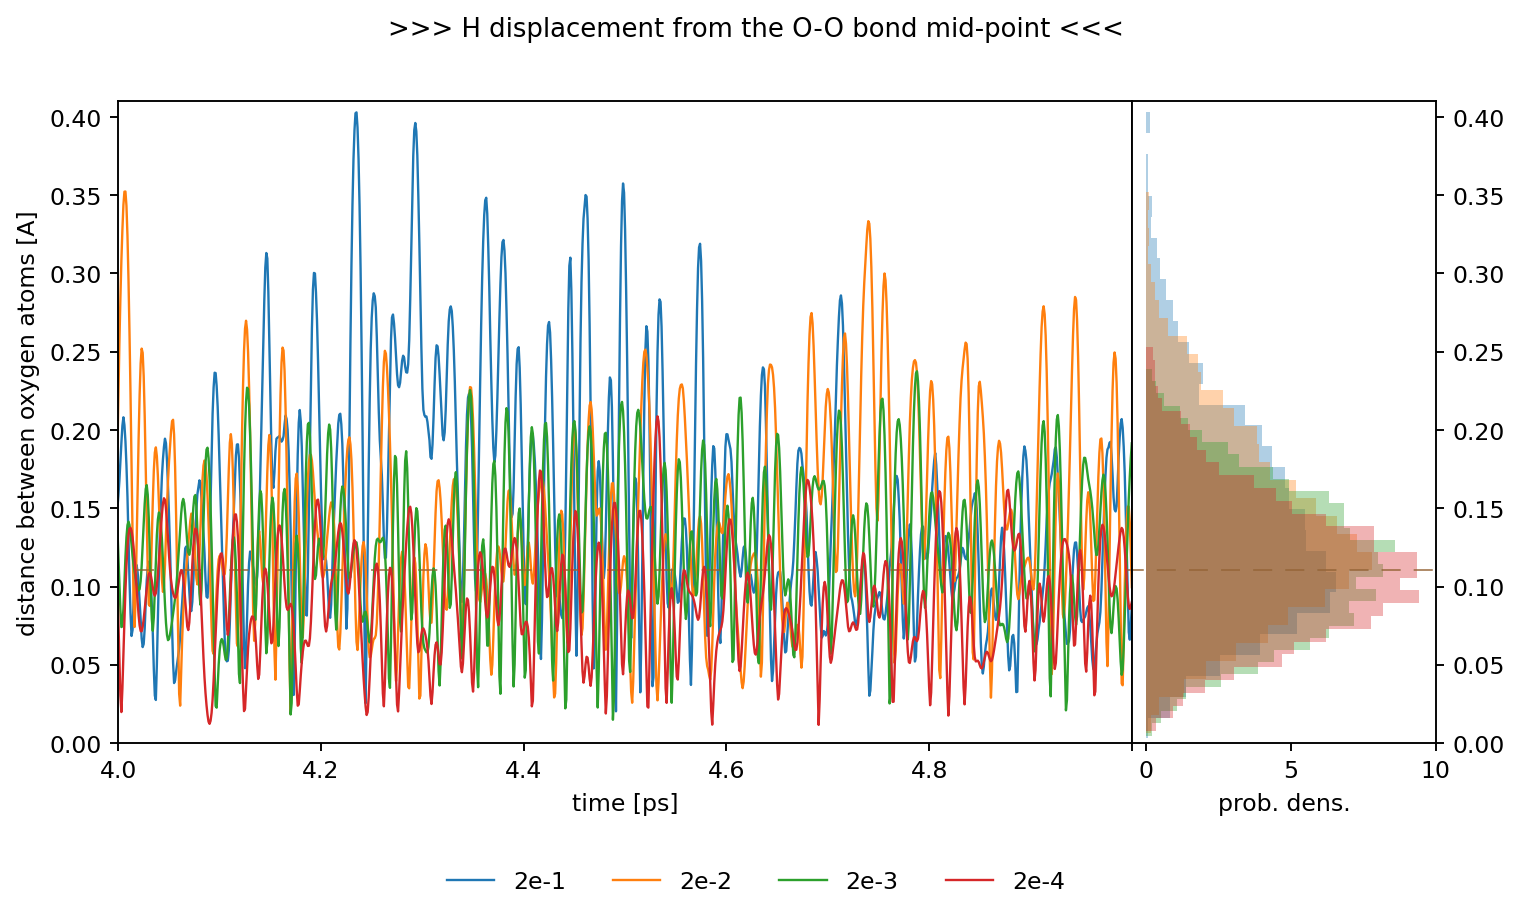

In [105]:
fig, ax = plt.subplots(num=None, figsize=(10,5), dpi=170, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[10,3], figure=fig) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)

for lab,dirid in zip([-1,-2,-3,-4], [26,27,15,28]):
    ana_dir = "./simulation_{:03d}_cp2k/".format(dirid)
    
    bonds_oo = list()
    bonds_ch = list()
    angles = list()

    for i in range(1):
        times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_{:03d}.log".format(i))
        oxygen_ids = [0, 3]
        shared_H_id = 4

        ird = iread(ana_dir + "coords_transformed_{:03d}.traj".format(i), index=':')

        bond_OO = np.zeros(len(times))
        bond_cH = np.zeros(len(times))
        angle_OHO = np.zeros(len(times))

        for f, frame in enumerate(ird):
            cell_center = frame.get_cell().sum(axis=0) / 2
            ox1, ox2 = frame.get_positions()[oxygen_ids]
            hydr = frame.get_positions()[shared_H_id]

            d_ox = np.sqrt(((ox2 - ox1)**2).sum())
            d_cH = np.sqrt(((hydr - cell_center)**2).sum())

            vec1 = ox1 - hydr
            vec2 = ox2 - hydr
            normal = lambda v: v / np.linalg.norm(v)
            angle = np.arccos(np.dot(normal(vec1), normal(vec2)))
            
            bond_OO[f] = d_ox
            bond_cH[f] = d_cH
            angle_OHO[f] = angle
             
    bonds_oo.append(bond_OO)
    bonds_ch.append(bond_cH)
    angles.append(angle_OHO)

    boo = np.array(bonds_oo)
    bch = np.array(bonds_ch)
    ang = np.array(angles)
    
    boo = bch

    ax0.fill_between(times, boo.max(axis=0), boo.min(axis=0), alpha=0.1)
    line = ax0.plot(times, boo.mean(axis=0),linewidth=1,label="2e{}".format(lab))

    #mu, std = norm.fit(boo.mean(axis=0))
    #ydat = np.linspace(2.2,2.6,200)
    #xdat = norm.pdf(ydat, mu, std)

    ax1.hist(np.concatenate(boo[:,1000:]), bins=30, density=True, orientation='horizontal',alpha=0.35, color=line[0].get_color())
    #ax1.plot(xdat, ydat, label="2e{} fit ({:.3f},{:.3f})".format(lab,mu, std), linewidth=1.0, alpha=0.85, color=line[0].get_color())

    ax0.plot([-1,6], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,15)), linewidth=0.8, alpha=0.3)
    ax1.plot([-5,35], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,7)), linewidth=0.8, alpha=0.3)

ax0.set_ylim(0,0.41)
ax0.set_xlim(4,5)
ax0.set_xlabel("time [ps]")
ax0.set_ylabel("distance between oxygen atoms [A]")

ax1.set_xlim(-0.5,10)
#ax1.set_xticks([0,7.5,15])
ax1.set_xlabel("prob. dens.")
ax1.yaxis.tick_right()

plt.setp(ax0.get_xticklabels()[-1], visible=False)
plt.subplots_adjust(hspace=.0, wspace=0.0)

plt.suptitle('>>> '+'H displacement from the O-O bond mid-point'+' <<<', fontsize=11)

fig.legend(loc='upper center', prop={'size': 10}, frameon=False, bbox_to_anchor=(0.5, 0),ncol=4)
plt.show()

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



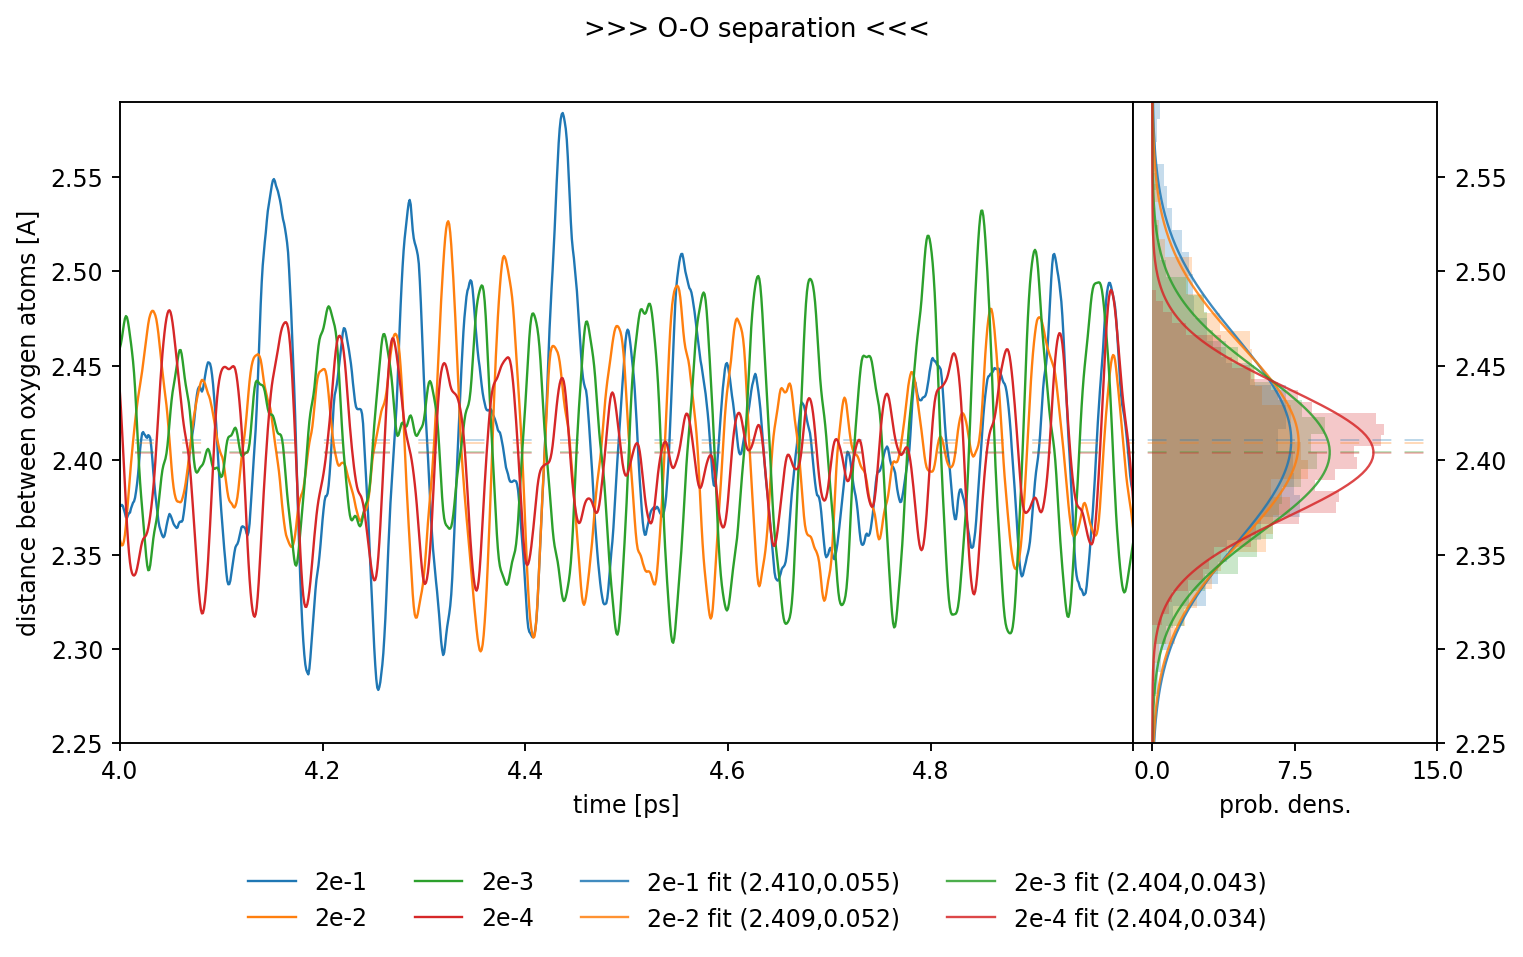

In [59]:

fig, ax = plt.subplots(num=None, figsize=(10,5), dpi=170, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[10,3], figure=fig) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)

for lab,dirid in zip([-1,-2,-3,-4], [26,27,15,28]):
    ana_dir = "./simulation_{:03d}_cp2k/".format(dirid)
    
    bonds_oo = list()
    bonds_ch = list()
    angles = list()

    for i in range(1):
        times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_{:03d}.log".format(i))
        oxygen_ids = [0, 3]
        shared_H_id = 4

        ird = iread(ana_dir + "coords_transformed_{:03d}.traj".format(i), index=':')

        bond_OO = np.zeros(len(times))
        bond_cH = np.zeros(len(times))
        angle_OHO = np.zeros(len(times))

        for f, frame in enumerate(ird):
            cell_center = frame.get_cell().sum(axis=0) / 2
            ox1, ox2 = frame.get_positions()[oxygen_ids]
            hydr = frame.get_positions()[shared_H_id]

            d_ox = np.sqrt(((ox2 - ox1)**2).sum())
            d_cH = np.sqrt(((hydr - cell_center)**2).sum())

            vec1 = ox1 - hydr
            vec2 = ox2 - hydr
            normal = lambda v: v / np.linalg.norm(v)
            angle = np.arccos(np.dot(normal(vec1), normal(vec2)))
            
            bond_OO[f] = d_ox
            bond_cH[f] = d_cH
            angle_OHO[f] = angle
             
    bonds_oo.append(bond_OO)
    bonds_ch.append(bond_cH)
    angles.append(angle_OHO)

    boo = np.array(bonds_oo)
    bch = np.array(bonds_ch)
    ang = np.array(angles)

    ax0.fill_between(times, boo.max(axis=0), boo.min(axis=0), alpha=0.1)
    line = ax0.plot(times, boo.mean(axis=0),linewidth=1,label="2e{}".format(lab))

    mu, std = norm.fit(boo.mean(axis=0))
    ydat = np.linspace(2.2,2.6,200)
    xdat = norm.pdf(ydat, mu, std)

    ax1.hist(np.concatenate(boo[:,1000:]), bins=30, density=True, orientation='horizontal',alpha=0.25, color=line[0].get_color())
    ax1.plot(xdat, ydat, label="2e{} fit ({:.3f},{:.3f})".format(lab,mu, std), linewidth=1.0, alpha=0.85, color=line[0].get_color())

    ax0.plot([-1,6], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,15)), linewidth=0.8, alpha=0.3)
    ax1.plot([-5,35], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,7)), linewidth=0.8, alpha=0.3)

ax0.set_ylim(2.25,2.59)
ax0.set_xlim(4,5)
ax0.set_xlabel("time [ps]")
ax0.set_ylabel("distance between oxygen atoms [A]")

ax1.set_xlim(-1,15)
ax1.set_xticks([0,7.5,15])
ax1.set_xlabel("prob. dens.")
ax1.yaxis.tick_right()

plt.setp(ax0.get_xticklabels()[-1], visible=False)
plt.subplots_adjust(hspace=.0, wspace=0.0)

plt.suptitle('>>> '+'O-O separation'+' <<<', fontsize=11)

fig.legend(loc='upper center', prop={'size': 10}, frameon=False, bbox_to_anchor=(0.5, 0),ncol=4)
plt.show()

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



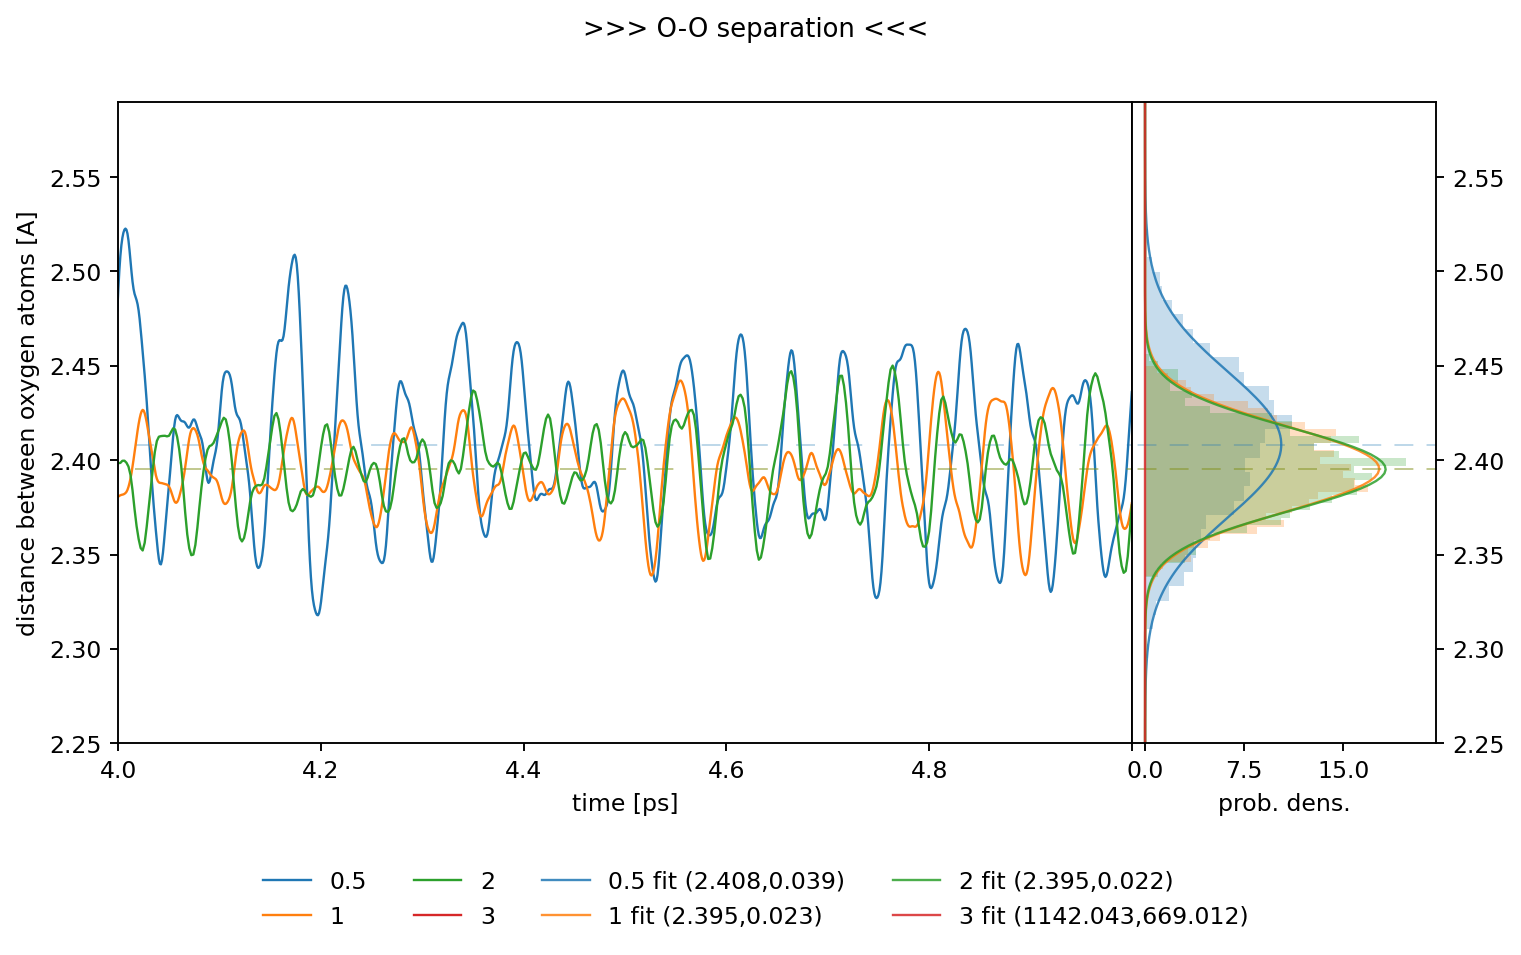

In [13]:

fig, ax = plt.subplots(num=None, figsize=(10,5), dpi=170, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[10,3], figure=fig) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)

for lab,dirid in zip([0.5, 1, 2, 3], [14, 10, 11, 12]):
    ana_dir = "./simulation_{:03d}_cp2k/".format(dirid)
    
    bonds_oo = list()
    bonds_ch = list()
    angles = list()

    for i in range(1):
        times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_{:03d}.log".format(i))
        oxygen_ids = [0, 3]
        shared_H_id = 4

        ird = iread(ana_dir + "coords_transformed_{:03d}.traj".format(i), index=':')

        bond_OO = np.zeros(len(times))
        bond_cH = np.zeros(len(times))
        angle_OHO = np.zeros(len(times))

        for f, frame in enumerate(ird):
            cell_center = frame.get_cell().sum(axis=0) / 2
            ox1, ox2 = frame.get_positions()[oxygen_ids]
            hydr = frame.get_positions()[shared_H_id]

            d_ox = np.sqrt(((ox2 - ox1)**2).sum())
            d_cH = np.sqrt(((hydr - cell_center)**2).sum())

            vec1 = ox1 - hydr
            vec2 = ox2 - hydr
            normal = lambda v: v / np.linalg.norm(v)
            angle = np.arccos(np.dot(normal(vec1), normal(vec2)))
            
            bond_OO[f] = d_ox
            bond_cH[f] = d_cH
            angle_OHO[f] = angle
             
    bonds_oo.append(bond_OO)
    bonds_ch.append(bond_cH)
    angles.append(angle_OHO)

    boo = np.array(bonds_oo)
    bch = np.array(bonds_ch)
    ang = np.array(angles)

    ax0.fill_between(times, boo.max(axis=0), boo.min(axis=0), alpha=0.1)
    line = ax0.plot(times, boo.mean(axis=0),linewidth=1,label="{}".format(lab))

    mu, std = norm.fit(boo.mean(axis=0))
    ydat = np.linspace(2.2,2.6,200)
    xdat = norm.pdf(ydat, mu, std)

    ax1.hist(np.concatenate(boo[:,1000:]), bins=30, density=True, orientation='horizontal',alpha=0.25, color=line[0].get_color())
    ax1.plot(xdat, ydat, label="{} fit ({:.3f},{:.3f})".format(lab,mu, std), linewidth=1.0, alpha=0.85, color=line[0].get_color())

    ax0.plot([-1,6], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,15)), linewidth=0.8, alpha=0.3)
    ax1.plot([-5,35], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,7)), linewidth=0.8, alpha=0.3)

ax0.set_ylim(2.25,2.59)
ax0.set_xlim(4,5)
ax0.set_xlabel("time [ps]")
ax0.set_ylabel("distance between oxygen atoms [A]")

ax1.set_xlim(-1,22)
ax1.set_xticks([0,7.5,15])
ax1.set_xlabel("prob. dens.")
ax1.yaxis.tick_right()

plt.setp(ax0.get_xticklabels()[-1], visible=False)
plt.subplots_adjust(hspace=.0, wspace=0.0)

plt.suptitle('>>> '+'O-O separation'+' <<<', fontsize=11)

fig.legend(loc='upper center', prop={'size': 10}, frameon=False, bbox_to_anchor=(0.5, 0),ncol=4)
plt.show()

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



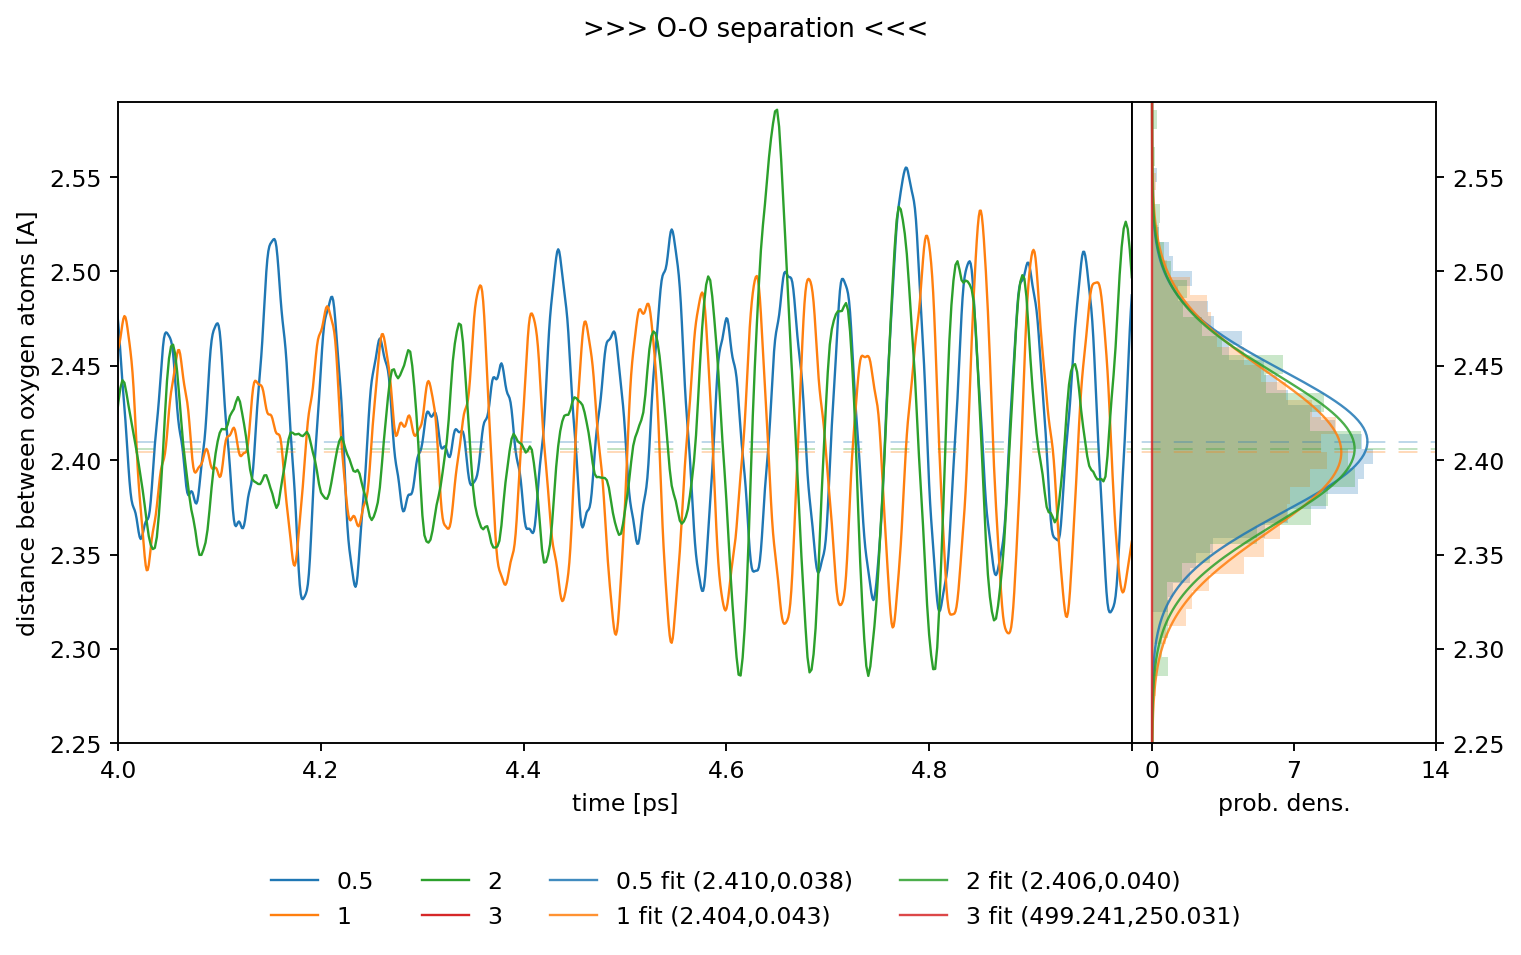

In [25]:

fig, ax = plt.subplots(num=None, figsize=(10,5), dpi=170, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[10,3], figure=fig) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)

for lab,dirid in zip([0.5, 1, 2, 3], [18, 15, 16, 17]):
    ana_dir = "./simulation_{:03d}_cp2k/".format(dirid)
    
    bonds_oo = list()
    bonds_ch = list()
    angles = list()

    for i in range(1):
        times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_{:03d}.log".format(i))
        oxygen_ids = [0, 3]
        shared_H_id = 4

        ird = iread(ana_dir + "coords_transformed_{:03d}.traj".format(i), index=':')

        bond_OO = np.zeros(len(times))
        bond_cH = np.zeros(len(times))
        angle_OHO = np.zeros(len(times))

        for f, frame in enumerate(ird):
            cell_center = frame.get_cell().sum(axis=0) / 2
            ox1, ox2 = frame.get_positions()[oxygen_ids]
            hydr = frame.get_positions()[shared_H_id]

            d_ox = np.sqrt(((ox2 - ox1)**2).sum())
            d_cH = np.sqrt(((hydr - cell_center)**2).sum())

            vec1 = ox1 - hydr
            vec2 = ox2 - hydr
            normal = lambda v: v / np.linalg.norm(v)
            angle = np.arccos(np.dot(normal(vec1), normal(vec2)))
            
            bond_OO[f] = d_ox
            bond_cH[f] = d_cH
            angle_OHO[f] = angle
             
    bonds_oo.append(bond_OO)
    bonds_ch.append(bond_cH)
    angles.append(angle_OHO)

    boo = np.array(bonds_oo)
    bch = np.array(bonds_ch)
    ang = np.array(angles)

    ax0.fill_between(times, boo.max(axis=0), boo.min(axis=0), alpha=0.1)
    line = ax0.plot(times, boo.mean(axis=0),linewidth=1,label="{}".format(lab))

    mu, std = norm.fit(boo.mean(axis=0))
    ydat = np.linspace(2.2,2.6,200)
    xdat = norm.pdf(ydat, mu, std)

    ax1.hist(np.concatenate(boo[:,1000:]), bins=30, density=True, orientation='horizontal',alpha=0.25, color=line[0].get_color())
    ax1.plot(xdat, ydat, label="{} fit ({:.3f},{:.3f})".format(lab,mu, std), linewidth=1.0, alpha=0.85, color=line[0].get_color())

    ax0.plot([-1,6], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,15)), linewidth=0.8, alpha=0.3)
    ax1.plot([-5,35], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,7)), linewidth=0.8, alpha=0.3)

ax0.set_ylim(2.25,2.59)
ax0.set_xlim(4,5)
ax0.set_xlabel("time [ps]")
ax0.set_ylabel("distance between oxygen atoms [A]")

ax1.set_xlim(-1,14)
ax1.set_xticks([0,7,14])
ax1.set_xlabel("prob. dens.")
ax1.yaxis.tick_right()

plt.setp(ax0.get_xticklabels()[-1], visible=False)
plt.subplots_adjust(hspace=.0, wspace=0.0)

plt.suptitle('>>> '+'O-O separation'+' <<<', fontsize=11)

fig.legend(loc='upper center', prop={'size': 10}, frameon=False, bbox_to_anchor=(0.5, 0),ncol=4)
plt.show()

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



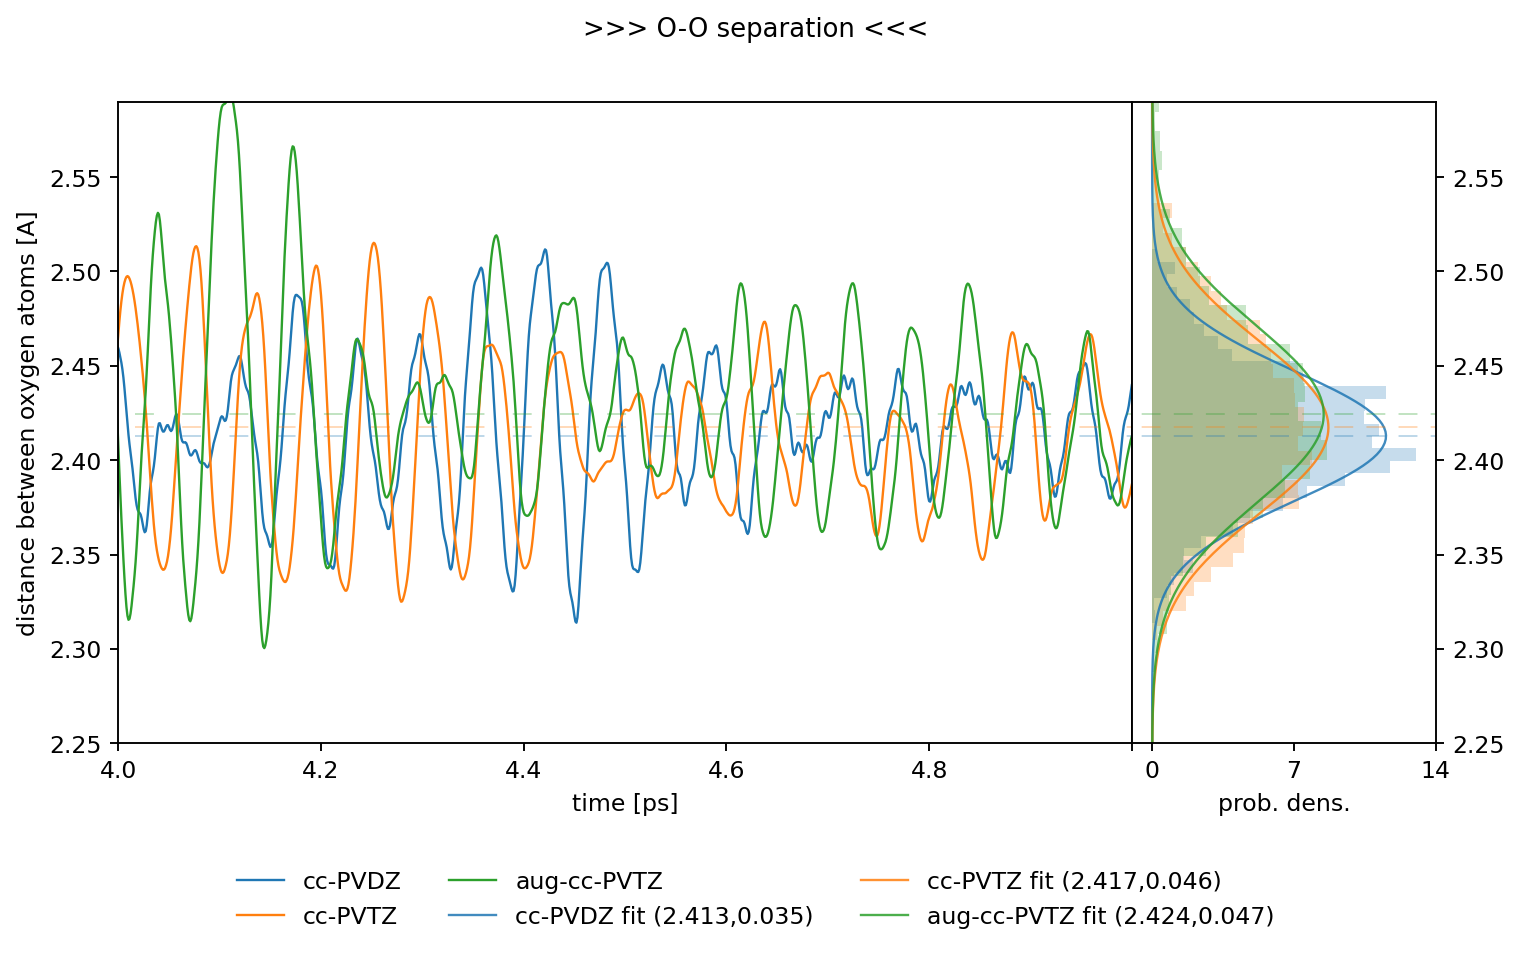

In [24]:

fig, ax = plt.subplots(num=None, figsize=(10,5), dpi=170, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[10,3], figure=fig) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)

for lab,dirid in zip(['cc-PVDZ', 'cc-PVTZ', 'aug-cc-PVTZ'], [34, 23, 36]):
    ana_dir = "./simulation_{:03d}_psi4/".format(dirid)
    
    bonds_oo = list()
    bonds_ch = list()
    angles = list()

    for i in range(1):
        times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_{:03d}.log".format(i))
        oxygen_ids = [0, 3]
        shared_H_id = 4

        ird = iread(ana_dir + "coords_transformed_{:03d}.traj".format(i), index=':')

        bond_OO = np.zeros(len(times))
        bond_cH = np.zeros(len(times))
        angle_OHO = np.zeros(len(times))

        for f, frame in enumerate(ird):
            cell_center = frame.get_cell().sum(axis=0) / 2
            ox1, ox2 = frame.get_positions()[oxygen_ids]
            hydr = frame.get_positions()[shared_H_id]

            d_ox = np.sqrt(((ox2 - ox1)**2).sum())
            d_cH = np.sqrt(((hydr - cell_center)**2).sum())

            vec1 = ox1 - hydr
            vec2 = ox2 - hydr
            normal = lambda v: v / np.linalg.norm(v)
            angle = np.arccos(np.dot(normal(vec1), normal(vec2)))
            
            bond_OO[f] = d_ox
            bond_cH[f] = d_cH
            angle_OHO[f] = angle
             
    bonds_oo.append(bond_OO)
    bonds_ch.append(bond_cH)
    angles.append(angle_OHO)

    boo = np.array(bonds_oo)
    bch = np.array(bonds_ch)
    ang = np.array(angles)

    ax0.fill_between(times, boo.max(axis=0), boo.min(axis=0), alpha=0.1)
    line = ax0.plot(times, boo.mean(axis=0),linewidth=1,label="{}".format(lab))

    mu, std = norm.fit(boo.mean(axis=0))
    ydat = np.linspace(2.2,2.6,200)
    xdat = norm.pdf(ydat, mu, std)

    ax1.hist(np.concatenate(boo[:,1000:]), bins=30, density=True, orientation='horizontal',alpha=0.25, color=line[0].get_color())
    ax1.plot(xdat, ydat, label="{} fit ({:.3f},{:.3f})".format(lab,mu, std), linewidth=1.0, alpha=0.85, color=line[0].get_color())

    ax0.plot([-1,6], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,15)), linewidth=0.8, alpha=0.3)
    ax1.plot([-5,35], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,7)), linewidth=0.8, alpha=0.3)

ax0.set_ylim(2.25,2.59)
ax0.set_xlim(4,5)
ax0.set_xlabel("time [ps]")
ax0.set_ylabel("distance between oxygen atoms [A]")

ax1.set_xlim(-1,14)
ax1.set_xticks([0,7,14])
ax1.set_xlabel("prob. dens.")
ax1.yaxis.tick_right()

plt.setp(ax0.get_xticklabels()[-1], visible=False)
plt.subplots_adjust(hspace=.0, wspace=0.0)

plt.suptitle('>>> '+'O-O separation'+' <<<', fontsize=11)

fig.legend(loc='upper center', prop={'size': 10}, frameon=False, bbox_to_anchor=(0.5, 0),ncol=3)
plt.show()

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



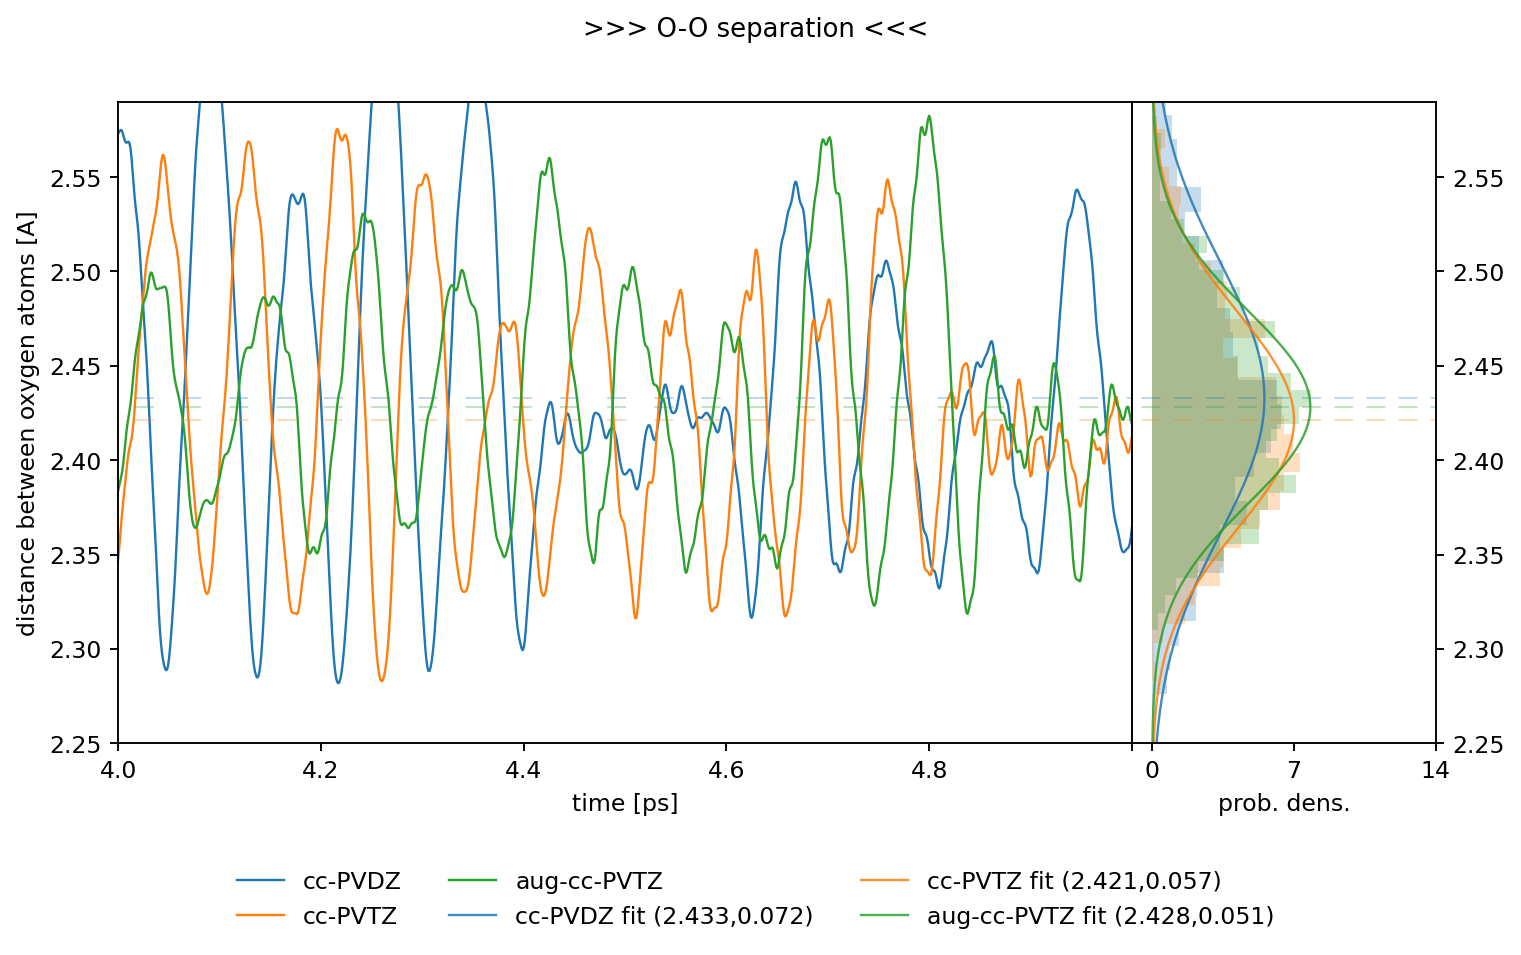

In [26]:

fig, ax = plt.subplots(num=None, figsize=(10,5), dpi=170, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[10,3], figure=fig) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)

for lab,dirid in zip(['cc-PVDZ', 'cc-PVTZ', 'aug-cc-PVTZ'], [33, 30, 35]):
    ana_dir = "./simulation_{:03d}_psi4/".format(dirid)
    
    bonds_oo = list()
    bonds_ch = list()
    angles = list()

    for i in range(1):
        times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_{:03d}.log".format(i))
        oxygen_ids = [0, 3]
        shared_H_id = 4

        ird = iread(ana_dir + "coords_transformed_{:03d}.traj".format(i), index=':')

        bond_OO = np.zeros(len(times))
        bond_cH = np.zeros(len(times))
        angle_OHO = np.zeros(len(times))

        for f, frame in enumerate(ird):
            cell_center = frame.get_cell().sum(axis=0) / 2
            ox1, ox2 = frame.get_positions()[oxygen_ids]
            hydr = frame.get_positions()[shared_H_id]

            d_ox = np.sqrt(((ox2 - ox1)**2).sum())
            d_cH = np.sqrt(((hydr - cell_center)**2).sum())

            vec1 = ox1 - hydr
            vec2 = ox2 - hydr
            normal = lambda v: v / np.linalg.norm(v)
            angle = np.arccos(np.dot(normal(vec1), normal(vec2)))
            
            bond_OO[f] = d_ox
            bond_cH[f] = d_cH
            angle_OHO[f] = angle
             
    bonds_oo.append(bond_OO)
    bonds_ch.append(bond_cH)
    angles.append(angle_OHO)

    boo = np.array(bonds_oo)
    bch = np.array(bonds_ch)
    ang = np.array(angles)

    ax0.fill_between(times, boo.max(axis=0), boo.min(axis=0), alpha=0.1)
    line = ax0.plot(times, boo.mean(axis=0),linewidth=1,label="{}".format(lab))

    mu, std = norm.fit(boo.mean(axis=0))
    ydat = np.linspace(2.2,2.6,200)
    xdat = norm.pdf(ydat, mu, std)

    ax1.hist(np.concatenate(boo[:,1000:]), bins=30, density=True, orientation='horizontal',alpha=0.25, color=line[0].get_color())
    ax1.plot(xdat, ydat, label="{} fit ({:.3f},{:.3f})".format(lab,mu, std), linewidth=1.0, alpha=0.85, color=line[0].get_color())

    ax0.plot([-1,6], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,15)), linewidth=0.8, alpha=0.3)
    ax1.plot([-5,35], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,7)), linewidth=0.8, alpha=0.3)

ax0.set_ylim(2.25,2.59)
ax0.set_xlim(4,5)
ax0.set_xlabel("time [ps]")
ax0.set_ylabel("distance between oxygen atoms [A]")

ax1.set_xlim(-1,14)
ax1.set_xticks([0,7,14])
ax1.set_xlabel("prob. dens.")
ax1.yaxis.tick_right()

plt.setp(ax0.get_xticklabels()[-1], visible=False)
plt.subplots_adjust(hspace=.0, wspace=0.0)

plt.suptitle('>>> '+'O-O separation'+' <<<', fontsize=11)

fig.legend(loc='upper center', prop={'size': 10}, frameon=False, bbox_to_anchor=(0.5, 0),ncol=3)
plt.show()

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



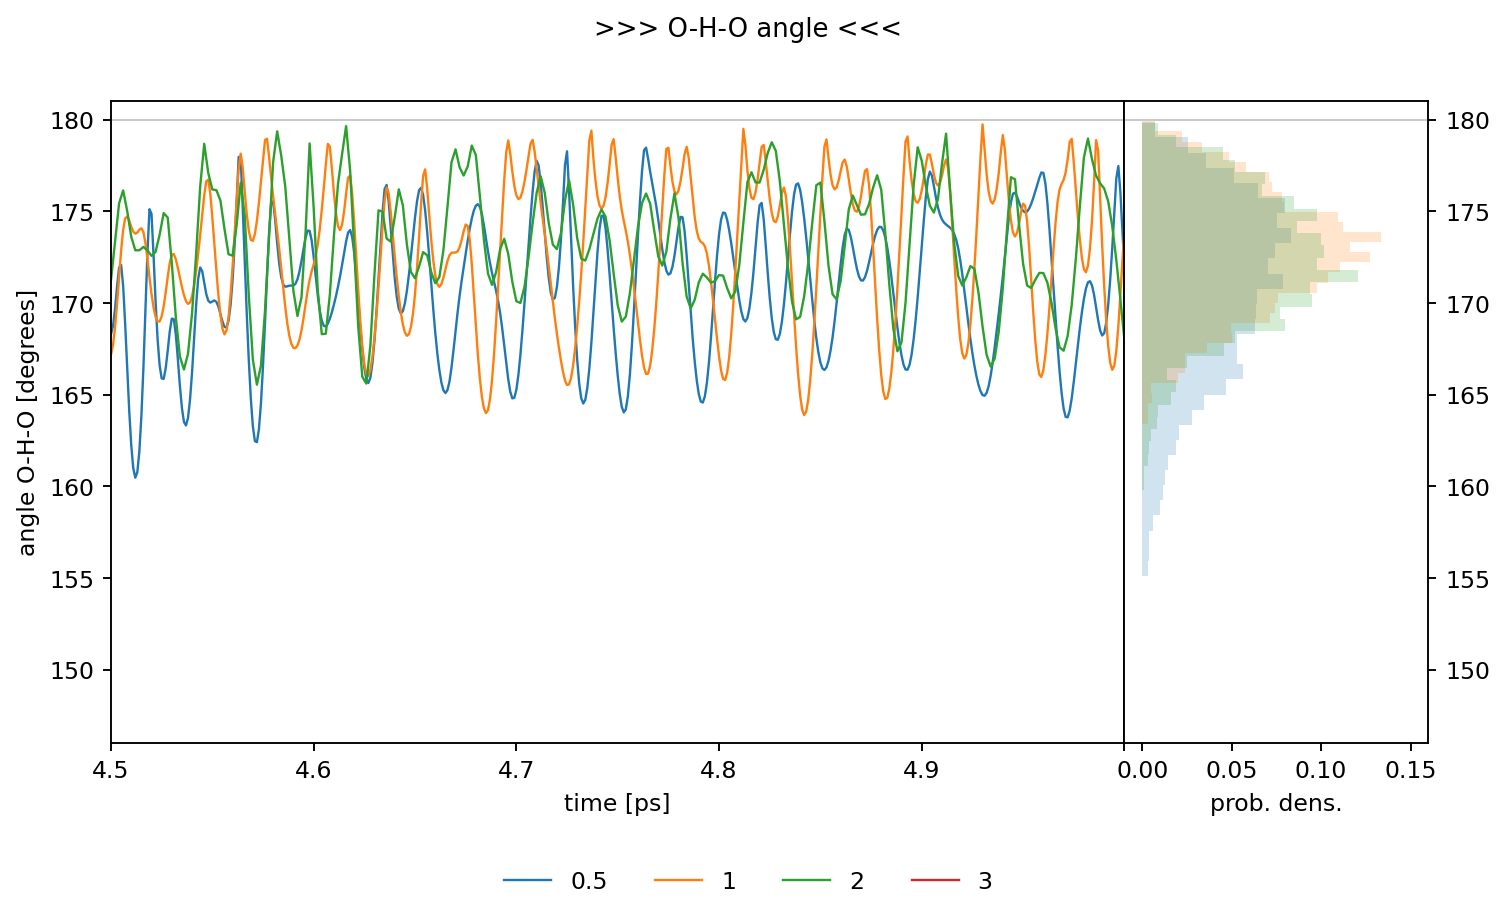

In [15]:

fig, ax = plt.subplots(num=None, figsize=(10,5), dpi=170, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[10,3], figure=fig) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)

for lab,dirid in zip([0.5, 1, 2, 3], [14, 10, 11, 12]):
    ana_dir = "./simulation_{:03d}_cp2k/".format(dirid)
    
    bonds_oo = list()
    bonds_ch = list()
    angles = list()

    for i in range(1):
        times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_{:03d}.log".format(i))
        oxygen_ids = [0, 3]
        shared_H_id = 4

        ird = iread(ana_dir + "coords_transformed_{:03d}.traj".format(i), index=':')
        #ird = iread(ana_dir + "coords_{:03d}.traj".format(i), index=':')

        bond_OO = np.zeros(len(times))
        bond_cH = np.zeros(len(times))
        angle_OHO = np.zeros(len(times))

        for f, frame in enumerate(ird):
            cell_center = frame.get_cell().sum(axis=0) / 2
            ox1, ox2 = frame.get_positions()[oxygen_ids]
            hydr = frame.get_positions()[shared_H_id]

            d_ox = np.sqrt(((ox2 - ox1)**2).sum())
            d_cH = np.sqrt(((hydr - cell_center)**2).sum())

            vec1 = ox1 - hydr
            vec2 = ox2 - hydr
            normal = lambda v: v / np.linalg.norm(v)
            angle = np.arccos(np.dot(normal(vec1), normal(vec2))) / np.pi * 180
            
            bond_OO[f] = d_ox
            bond_cH[f] = d_cH
            angle_OHO[f] = angle
             
    bonds_oo.append(bond_OO)
    bonds_ch.append(bond_cH)
    angles.append(angle_OHO)

    boo = np.array(bonds_oo)
    bch = np.array(bonds_ch)
    ang = np.array(angles)
    
    boo = ang

    #ax0.fill_between(times, boo.max(axis=0), boo.min(axis=0), alpha=0.1)
    line = ax0.plot(times, boo.mean(axis=0),linewidth=1,label="{}".format(lab))

    pars = foldnorm.fit(-(boo.mean(axis=0)[1000:]-180))
    ydat = np.linspace(0, 60, 300)
    xdat = foldnorm.pdf(ydat, *pars)

    ax1.hist(np.concatenate(boo[:,1000:]), bins=30, density=True, orientation='horizontal',alpha=0.2, color=line[0].get_color())
    #ax1.plot(xdat, 180-ydat, label="2e{} fit".format(lab), linewidth=1.0, alpha=0.85, color=line[0].get_color())

    #ax0.plot([-1,6], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,15)), linewidth=0.8, alpha=0.3)
    #ax1.plot([-5,35], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,7)), linewidth=0.8, alpha=0.3)

ax0.set_ylim(146, 181)
ax0.set_xlim(4.5,5)
ax0.set_xlabel("time [ps]")
ax0.set_ylabel("angle O-H-O [degrees]")

ax0.plot([3,5], [180]*2, linewidth=0.7, color='grey', alpha=0.5)
ax1.plot([-1,1], [180]*2, linewidth=0.7, color='grey', alpha=0.5)

ax1.set_xlim(-0.01, 0.16)
#ax1.set_xticks([0,7.5,15])
ax1.set_xlabel("prob. dens.")
ax1.yaxis.tick_right()

plt.setp(ax0.get_xticklabels()[-1], visible=False)
plt.subplots_adjust(hspace=.0, wspace=0.0)

plt.suptitle('>>> '+'O-H-O angle'+' <<<', fontsize=11)

fig.legend(loc='upper center', prop={'size': 10}, frameon=False, bbox_to_anchor=(0.5, 0),ncol=4)
plt.show()

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



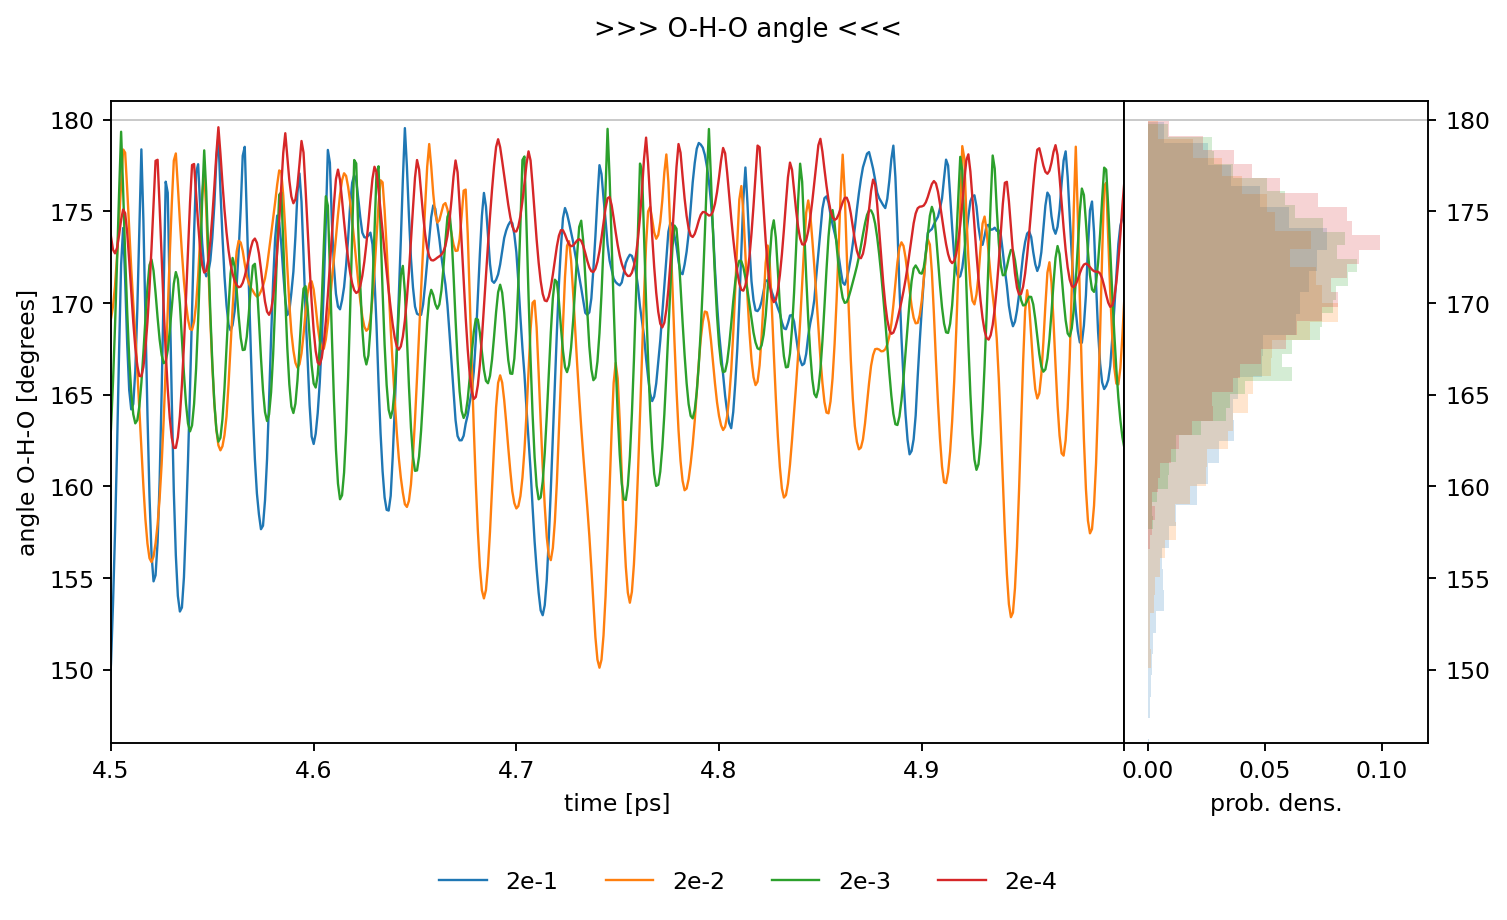

In [9]:

fig, ax = plt.subplots(num=None, figsize=(10,5), dpi=170, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[10,3], figure=fig) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)

for lab,dirid in zip([-1,-2,-3,-4], [26,27,15,28]):
    ana_dir = "./simulation_{:03d}_cp2k/".format(dirid)
    
    bonds_oo = list()
    bonds_ch = list()
    angles = list()

    for i in range(1):
        times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_{:03d}.log".format(i))
        oxygen_ids = [0, 3]
        shared_H_id = 4

        ird = iread(ana_dir + "coords_transformed_{:03d}.traj".format(i), index=':')
        #ird = iread(ana_dir + "coords_{:03d}.traj".format(i), index=':')

        bond_OO = np.zeros(len(times))
        bond_cH = np.zeros(len(times))
        angle_OHO = np.zeros(len(times))

        for f, frame in enumerate(ird):
            cell_center = frame.get_cell().sum(axis=0) / 2
            ox1, ox2 = frame.get_positions()[oxygen_ids]
            hydr = frame.get_positions()[shared_H_id]

            d_ox = np.sqrt(((ox2 - ox1)**2).sum())
            d_cH = np.sqrt(((hydr - cell_center)**2).sum())

            vec1 = ox1 - hydr
            vec2 = ox2 - hydr
            normal = lambda v: v / np.linalg.norm(v)
            angle = np.arccos(np.dot(normal(vec1), normal(vec2))) / np.pi * 180
            
            bond_OO[f] = d_ox
            bond_cH[f] = d_cH
            angle_OHO[f] = angle
             
    bonds_oo.append(bond_OO)
    bonds_ch.append(bond_cH)
    angles.append(angle_OHO)

    boo = np.array(bonds_oo)
    bch = np.array(bonds_ch)
    ang = np.array(angles)
    
    boo = ang

    #ax0.fill_between(times, boo.max(axis=0), boo.min(axis=0), alpha=0.1)
    line = ax0.plot(times, boo.mean(axis=0),linewidth=1,label="2e{}".format(lab))

    pars = foldnorm.fit(-(boo.mean(axis=0)[1000:]-180))
    ydat = np.linspace(0, 60, 300)
    xdat = foldnorm.pdf(ydat, *pars)

    ax1.hist(np.concatenate(boo[:,1000:]), bins=30, density=True, orientation='horizontal',alpha=0.2, color=line[0].get_color())
    #ax1.plot(xdat, 180-ydat, label="2e{} fit".format(lab), linewidth=1.0, alpha=0.85, color=line[0].get_color())

    #ax0.plot([-1,6], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,15)), linewidth=0.8, alpha=0.3)
    #ax1.plot([-5,35], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,7)), linewidth=0.8, alpha=0.3)

ax0.set_ylim(146, 181)
ax0.set_xlim(4.5,5)
ax0.set_xlabel("time [ps]")
ax0.set_ylabel("angle O-H-O [degrees]")

ax0.plot([3,5], [180]*2, linewidth=0.7, color='grey', alpha=0.5)
ax1.plot([-1,1], [180]*2, linewidth=0.7, color='grey', alpha=0.5)

ax1.set_xlim(-0.01, 0.12)
#ax1.set_xticks([0,7.5,15])
ax1.set_xlabel("prob. dens.")
ax1.yaxis.tick_right()

plt.setp(ax0.get_xticklabels()[-1], visible=False)
plt.subplots_adjust(hspace=.0, wspace=0.0)

plt.suptitle('>>> '+'O-H-O angle'+' <<<', fontsize=11)

fig.legend(loc='upper center', prop={'size': 10}, frameon=False, bbox_to_anchor=(0.5, 0),ncol=4)
plt.show()

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



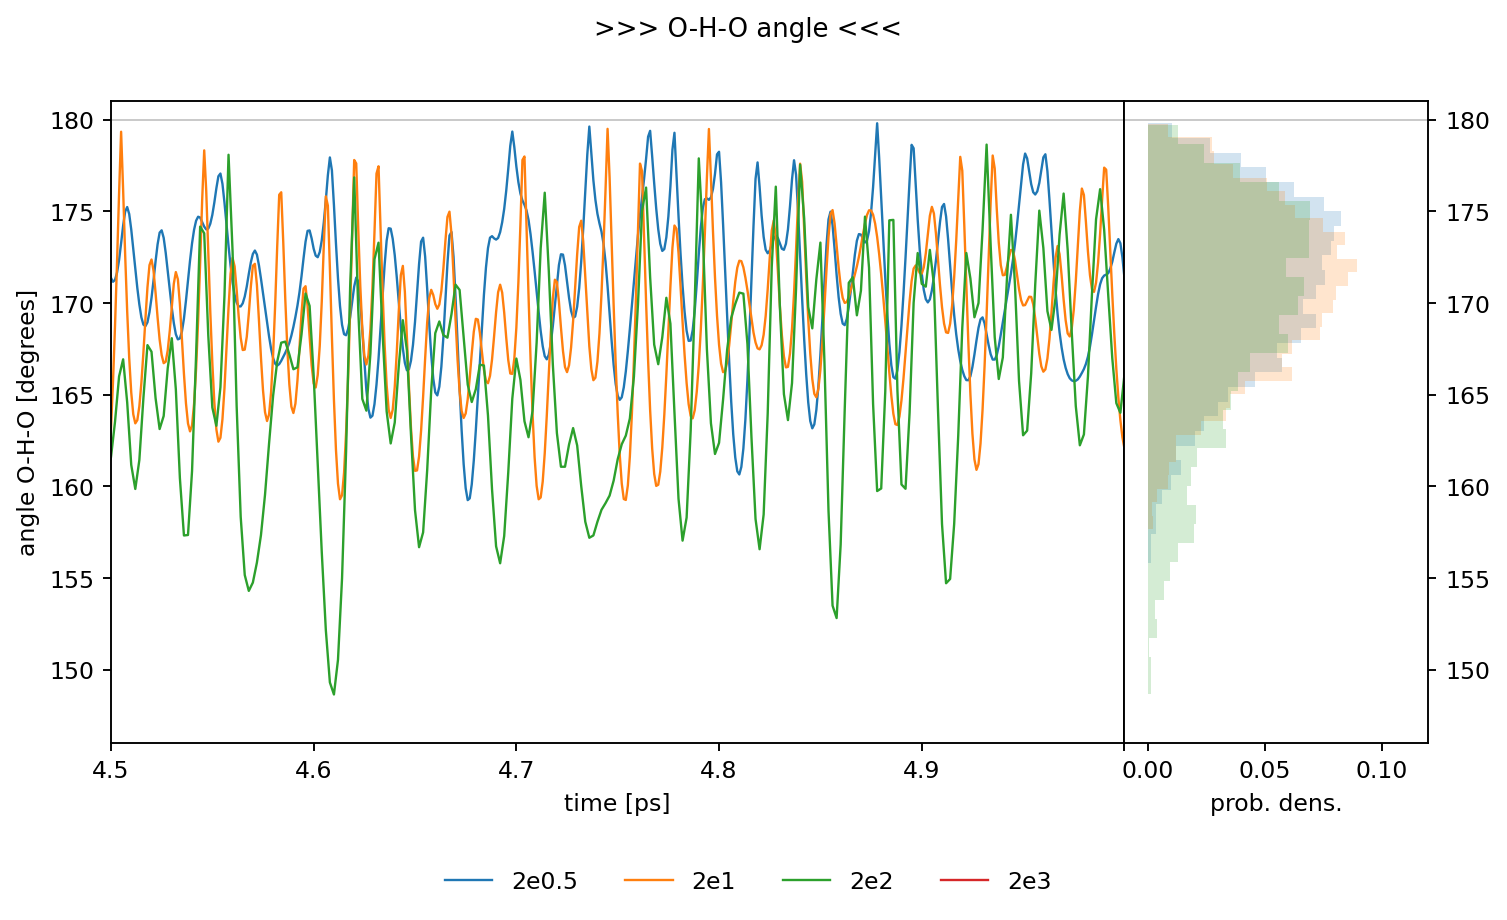

In [19]:

fig, ax = plt.subplots(num=None, figsize=(10,5), dpi=170, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[10,3], figure=fig) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1],sharey=ax0)

for lab,dirid in zip([0.5, 1, 2, 3], [18, 15, 16, 17]):
    ana_dir = "./simulation_{:03d}_cp2k/".format(dirid)
    
    bonds_oo = list()
    bonds_ch = list()
    angles = list()

    for i in range(1):
        times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_{:03d}.log".format(i))
        oxygen_ids = [0, 3]
        shared_H_id = 4

        ird = iread(ana_dir + "coords_transformed_{:03d}.traj".format(i), index=':')
        #ird = iread(ana_dir + "coords_{:03d}.traj".format(i), index=':')

        bond_OO = np.zeros(len(times))
        bond_cH = np.zeros(len(times))
        angle_OHO = np.zeros(len(times))

        for f, frame in enumerate(ird):
            cell_center = frame.get_cell().sum(axis=0) / 2
            ox1, ox2 = frame.get_positions()[oxygen_ids]
            hydr = frame.get_positions()[shared_H_id]

            d_ox = np.sqrt(((ox2 - ox1)**2).sum())
            d_cH = np.sqrt(((hydr - cell_center)**2).sum())

            vec1 = ox1 - hydr
            vec2 = ox2 - hydr
            normal = lambda v: v / np.linalg.norm(v)
            angle = np.arccos(np.dot(normal(vec1), normal(vec2))) / np.pi * 180
            
            bond_OO[f] = d_ox
            bond_cH[f] = d_cH
            angle_OHO[f] = angle
             
    bonds_oo.append(bond_OO)
    bonds_ch.append(bond_cH)
    angles.append(angle_OHO)

    boo = np.array(bonds_oo)
    bch = np.array(bonds_ch)
    ang = np.array(angles)
    
    boo = ang

    #ax0.fill_between(times, boo.max(axis=0), boo.min(axis=0), alpha=0.1)
    line = ax0.plot(times, boo.mean(axis=0),linewidth=1,label="2e{}".format(lab))

    pars = foldnorm.fit(-(boo.mean(axis=0)[1000:]-180))
    ydat = np.linspace(0, 60, 300)
    xdat = foldnorm.pdf(ydat, *pars)

    ax1.hist(np.concatenate(boo[:,1000:]), bins=30, density=True, orientation='horizontal',alpha=0.2, color=line[0].get_color())
    #ax1.plot(xdat, 180-ydat, label="2e{} fit".format(lab), linewidth=1.0, alpha=0.85, color=line[0].get_color())

    #ax0.plot([-1,6], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,15)), linewidth=0.8, alpha=0.3)
    #ax1.plot([-5,35], [mu,mu], c=line[0].get_color(), linestyle=(3,(10,7)), linewidth=0.8, alpha=0.3)

ax0.set_ylim(146, 181)
ax0.set_xlim(4.5,5)
ax0.set_xlabel("time [ps]")
ax0.set_ylabel("angle O-H-O [degrees]")

ax0.plot([3,5], [180]*2, linewidth=0.7, color='grey', alpha=0.5)
ax1.plot([-1,1], [180]*2, linewidth=0.7, color='grey', alpha=0.5)

ax1.set_xlim(-0.01, 0.12)
#ax1.set_xticks([0,7.5,15])
ax1.set_xlabel("prob. dens.")
ax1.yaxis.tick_right()

plt.setp(ax0.get_xticklabels()[-1], visible=False)
plt.subplots_adjust(hspace=.0, wspace=0.0)

plt.suptitle('>>> '+'O-H-O angle'+' <<<', fontsize=11)

fig.legend(loc='upper center', prop={'size': 10}, frameon=False, bbox_to_anchor=(0.5, 0),ncol=4)
plt.show()

## 2D histogram

In [111]:
ana_dir = "./simulation_025_orca/"

times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_000.log")
oxygen_ids = [0, 3]
shared_H_id = 4

ird = iread(ana_dir + "coords_transformed_000.traj", index=':')

ox1_pos = np.zeros(shape=(len(times),2))
ox2_pos = np.zeros(shape=(len(times),2))
shH_pos = np.zeros(shape=(len(times),2))

for i, frame in enumerate(ird):
    cell_center = frame.get_cell().sum(axis=0) / 2
    ox1, ox2, sH = frame.get_positions()[oxygen_ids+[shared_H_id]]
    
    ox1_pos[i] = ox1[[0,2]] -6
    ox2_pos[i] = ox2[[0,2]] -6
    shH_pos[i] = sH[[0,2]] -6

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



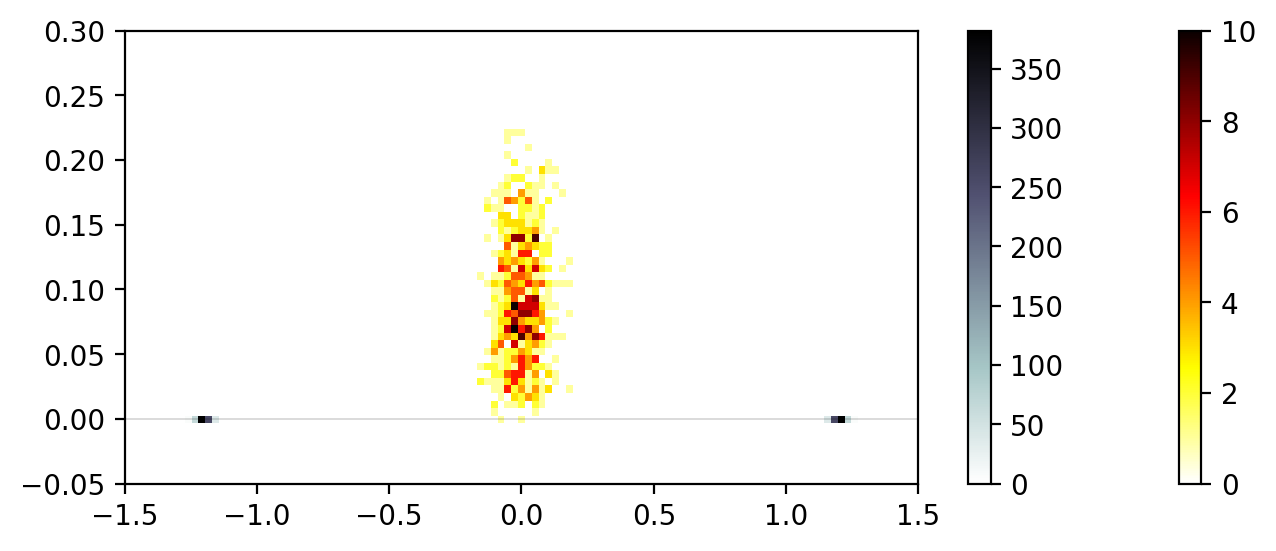

In [392]:
kx = 35
ky = 60

fig, ax = plt.subplots(ncols=3,figsize=(8,3),dpi=200)
hist1 = ax.hist2d(shH_pos.T[0], shH_pos.T[1], bins=[kx,ky], range=[[-0.45,0.45],[-0.05,0.3]], cmap='hot_r')
hist2L = ax.hist2d(ox1_pos.T[0], ox1_pos.T[1], bins=[kx,ky], range=[[-1.35,-0.45],[-0.05,0.3]],cmap='bone_r')
hist2R = ax.hist2d(ox2_pos.T[0], ox2_pos.T[1], bins=[kx,ky], range=[[0.45,1.35],[-0.05,0.3]],cmap='bone_r')
ax.plot([-2,2], [0,0], c='k', linewidth=0.1)

ax.set_xlim(-1.5,1.5)

fig.colorbar(hist1[3], orientation = 'vertical')
fig.colorbar(hist2L[3], orientation = 'vertical')

plt.show()

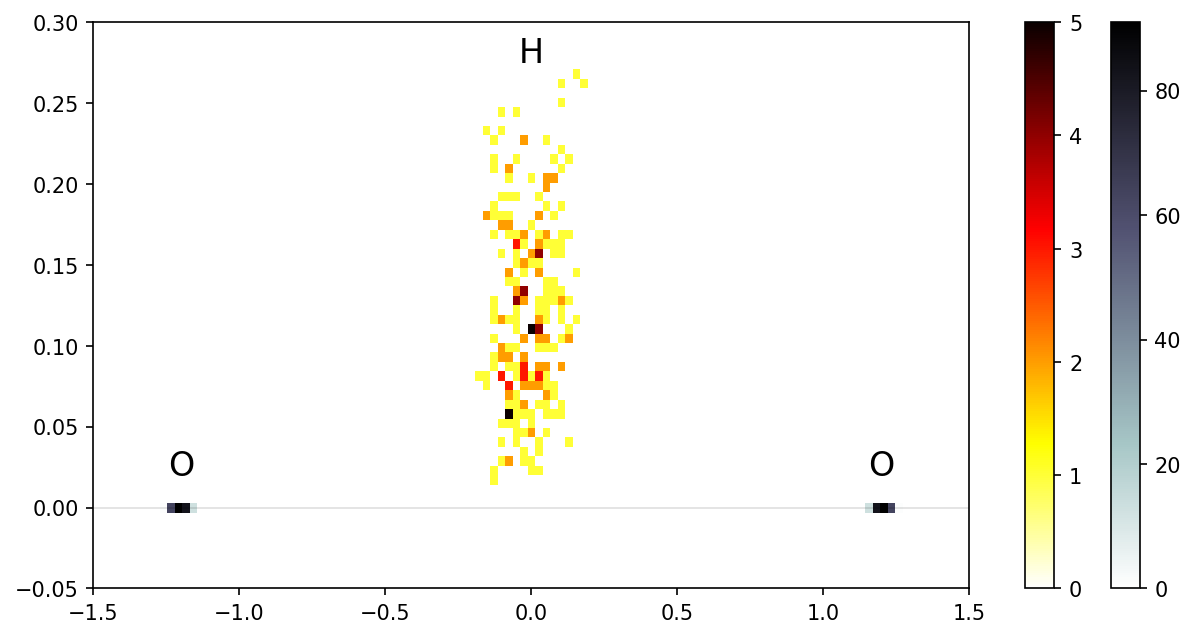

In [58]:
fig, ax = plt.subplots(num=None, figsize=(9,5), dpi=150, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[30,1,1], figure=fig) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

kx = 35
ky = 60

hist1 = ax0.hist2d(shH_pos.T[0], shH_pos.T[1], bins=[kx,ky], range=[[-0.45,0.45],[-0.05,0.3]], cmap='hot_r')
hist2L = ax0.hist2d(ox1_pos.T[0], ox1_pos.T[1], bins=[kx,ky], range=[[-1.35,-0.45],[-0.05,0.3]],cmap='bone_r')
hist2R = ax0.hist2d(ox2_pos.T[0], ox2_pos.T[1], bins=[kx,ky], range=[[0.45,1.35],[-0.05,0.3]],cmap='bone_r')
ax0.plot([-2,2], [0,0], c='k', linewidth=0.1)

ax0.set_xlim(-1.5,1.5)

plt.subplots_adjust(hspace=.5, wspace=0.18)

plt.colorbar(hist1[3], cax=ax1, orientation = 'vertical')
plt.colorbar(hist2L[3], cax=ax2, orientation = 'vertical')

ax0.text(-1.2,0.02, "O", fontsize=16, horizontalalignment='center')
ax0.text(1.2,0.02, "O", fontsize=16, horizontalalignment='center')
ax0.text(0,0.275, "H", fontsize=16, horizontalalignment='center')

plt.show()

In [118]:
ana_dir = "./simulation_018_cp2k/"


times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_000.log")
oxygen_ids = [0, 3]
shared_H_id = 4

ird = iread(ana_dir + "coords_transformed_000.traj", index=':')

ox1_pos = np.zeros(shape=(len(times),2))
ox2_pos = np.zeros(shape=(len(times),2))
shH_pos = np.zeros(shape=(len(times),2))

for i, frame in enumerate(ird):
    cell_center = frame.get_cell().sum(axis=0) / 2
    ox1, ox2, sH = frame.get_positions()[oxygen_ids+[shared_H_id]]
    
    ox1_pos[i] = ox1[[0,2]] -6
    ox2_pos[i] = ox2[[0,2]] -6
    shH_pos[i] = sH[[0,2]] -6

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



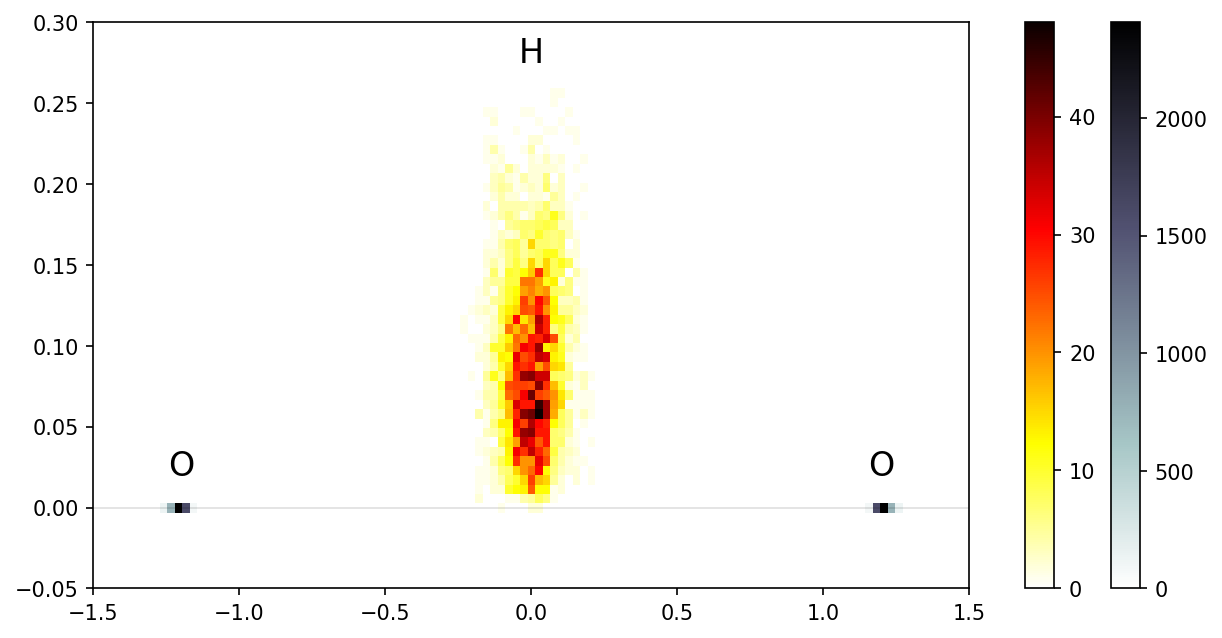

In [119]:
fig, ax = plt.subplots(num=None, figsize=(9,5), dpi=150, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[30,1,1], figure=fig) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

kx = 35
ky = 60

hist1 = ax0.hist2d(shH_pos.T[0], shH_pos.T[1], bins=[kx,ky], range=[[-0.45,0.45],[-0.05,0.3]], cmap='hot_r')
hist2L = ax0.hist2d(ox1_pos.T[0], ox1_pos.T[1], bins=[kx,ky], range=[[-1.35,-0.45],[-0.05,0.3]],cmap='bone_r')
hist2R = ax0.hist2d(ox2_pos.T[0], ox2_pos.T[1], bins=[kx,ky], range=[[0.45,1.35],[-0.05,0.3]],cmap='bone_r')
ax0.plot([-2,2], [0,0], c='k', linewidth=0.1)

ax0.set_xlim(-1.5,1.5)

plt.subplots_adjust(hspace=.5, wspace=0.18)

plt.colorbar(hist1[3], cax=ax1, orientation = 'vertical')
plt.colorbar(hist2L[3], cax=ax2, orientation = 'vertical')

ax0.text(-1.2,0.02, "O", fontsize=16, horizontalalignment='center')
ax0.text(1.2,0.02, "O", fontsize=16, horizontalalignment='center')
ax0.text(0,0.275, "H", fontsize=16, horizontalalignment='center')

plt.show()

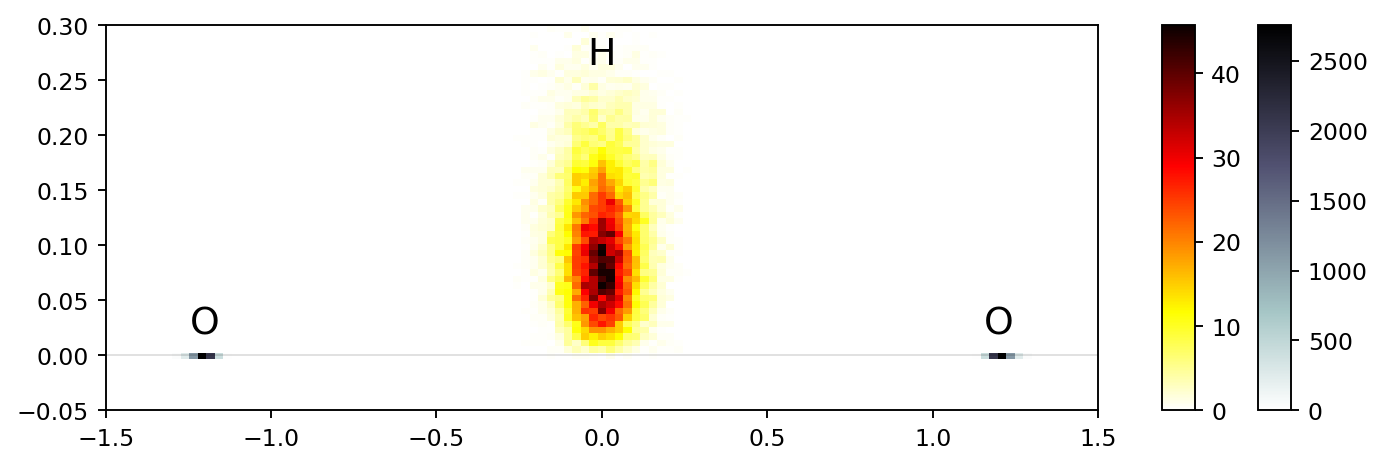

In [38]:
fig, ax = plt.subplots(num=None, figsize=(9,3), dpi=170, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[30,1,1], figure=fig) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

kx = 35
ky = 60

oxygen_ids = [0, 3]
hydrogen_id = 4

ox1_id_pos = list()
ox2_id_pos = list()
shH_id_pos = list()

dname = "./simulation_015_cp2k"

for i in range(5):
    with capture_output() as captured:
        times, E_tot, E_pot, E_kin = load_energies(dname + "/energies_{:03d}.log".format(i))
    num_times = len(times)

    ird = iread(dname + "/coords_transformed_{:03d}.traj".format(i), index=':')
    ox1_pos = np.zeros(shape=(num_times, 2))
    ox2_pos = np.zeros(shape=(num_times, 2))
    shH_pos = np.zeros(shape=(num_times, 2))

    for i, frame in enumerate(ird):
        cell_center = frame.get_cell().sum(axis=0) / 2
        ox1, ox2, sH = frame.get_positions()[oxygen_ids + [hydrogen_id]]

        ox1_pos[i] = ox1[[0, 2]] - 6
        ox2_pos[i] = ox2[[0, 2]] - 6
        shH_pos[i] = sH[[0, 2]] - 6

    ox1_id_pos.append(ox1_pos)
    ox2_id_pos.append(ox2_pos)
    shH_id_pos.append(shH_pos)

ox1_id_pos = np.concatenate(np.array(ox1_id_pos), axis=0)
ox2_id_pos = np.concatenate(np.array(ox2_id_pos), axis=0)
shH_id_pos = np.concatenate(np.array(shH_id_pos), axis=0)

hist1 = ax0.hist2d(shH_id_pos.T[0], shH_id_pos.T[1], bins=[kx,ky], range=[[-0.45,0.45],[-0.05,0.3]], cmap='hot_r',density=True)
hist2L = ax0.hist2d(ox1_id_pos.T[0], ox1_id_pos.T[1], bins=[kx,ky], range=[[-1.35,-0.45],[-0.05,0.3]],cmap='bone_r',density=True)
hist2R = ax0.hist2d(ox2_id_pos.T[0], ox2_id_pos.T[1], bins=[kx,ky], range=[[0.45,1.35],[-0.05,0.3]],cmap='bone_r',density=True)
ax0.plot([-2,2], [0,0], c='k', linewidth=0.1)

ax0.set_xlim(-1.5,1.5)

plt.subplots_adjust(hspace=.5, wspace=0.18)

plt.colorbar(hist1[3], cax=ax1, orientation = 'vertical')
plt.colorbar(hist2L[3], cax=ax2, orientation = 'vertical')

ax0.text(-1.2,0.02, "O", fontsize=16, horizontalalignment='center')
ax0.text(1.2,0.02, "O", fontsize=16, horizontalalignment='center')
ax0.text(0,0.265, "H", fontsize=16, horizontalalignment='center')

plt.show()

In [155]:
def plot_hist(indices, oxygen_ids=[0, 3], hydrogen_id=4, cell_width=12, contour=False, labels=None, nlevels=6):     
    num_ids = len(indices)
    fig, ax = plt.subplots(num=None, figsize=(3*num_ids, 1.5), dpi=160, facecolor='w', edgecolor='k')
    gs = gridspec.GridSpec(ncols=num_ids+1, nrows=1, width_ratios=[10]*num_ids+[1], figure=fig) 
    
    ax = [plt.subplot(gs[0])] 
    ax += [plt.subplot(gs[j], sharey=ax[0]) for j in range(1,num_ids)] if num_ids > 1 else []
    ax += [plt.subplot(gs[-1])]
    
    kx = 60
    ky = 35
    
    contlevs = list()
    iterlab = ['({})'.format(k) for k in range(1, num_ids+1)] if labels is None else ['({})\n{}'.format(k,l) for k,l in zip(range(1, num_ids+1), labels)]
        
    for num, index in enumerate(indices):
        dname = [d for d in os.listdir("./") if "simulation_{:03d}_".format(index) in d][0]
        max_num = max([int(f.split('.')[0].split('_')[1]) for f in os.listdir("./{}/".format(dname)) if 'energies' in f])
        
        ox1_id_pos = list()
        ox2_id_pos = list()
        shH_id_pos = list()
        
        for i in range(int(max_num) + 1):
            with capture_output() as captured:
                times, E_tot, E_pot, E_kin = load_energies(dname + "/energies_{:03d}.log".format(i))
            num_times = len(times)
            
            ird = iread(dname + "/coords_transformed_{:03d}.traj".format(i), index=':')
            ox1_pos = np.zeros(shape=(num_times, 2))
            ox2_pos = np.zeros(shape=(num_times, 2))
            shH_pos = np.zeros(shape=(num_times, 2))

            for i, frame in enumerate(ird):
                cell_center = frame.get_cell().sum(axis=0) / 2
                ox1, ox2, sH = frame.get_positions()[oxygen_ids + [hydrogen_id]]

                ox1_pos[i] = ox1[[0, 2]] - cell_width/2
                ox2_pos[i] = ox2[[0, 2]] - cell_width/2
                shH_pos[i] = sH[[0, 2]] - cell_width/2
            
            ox1_id_pos.append(ox1_pos)
            ox2_id_pos.append(ox2_pos)
            shH_id_pos.append(shH_pos)
            
        ox1_id_pos = np.concatenate(np.array(ox1_id_pos), axis=0)
        ox2_id_pos = np.concatenate(np.array(ox2_id_pos), axis=0)
        shH_id_pos = np.concatenate(np.array(shH_id_pos), axis=0)

        hdata = ax[num].hist2d(shH_id_pos.T[0], shH_id_pos.T[1], bins=[kx,ky], range=[[-0.4, 0.4], [-0.03, 0.4]], cmap='hot_r', visible=(not contour), density=True)
        if contour is True:
            xdata = (hdata[1][:-1] + hdata[1][1:]) / 2
            ydata = (hdata[2][:-1] + hdata[2][1:]) / 2
            cont = ax[num].contourf(xdata, ydata, hdata[0].T, *contlevs, cmap='hot_r', levels=nlevels, extend='min')
            contlevs.append(cont.levels) if num == 0 else None

        ax[num].plot([-2, 2], [0, 0], c='k', linewidth=0.1)

        ax[num].set_xlim(-0.35, 0.35)
        ax[num].set_xticks([-0.3,0,0.3])
        if num != 0:
            plt.setp(ax[num].get_yticklabels(), visible=False)
            ax[num].tick_params(axis='y', length=0)
        
        ax[num].set_title("{}\nN={}".format(iterlab[num], shH_id_pos.shape[0]), fontsize=10, loc='center')
    
    #plt.colorbar(hdata[3], cax=ax[-1], orientation = 'vertical')
    fig.colorbar(ScalarMappable(norm=Normalize(vmin=0, vmax=1), cmap='hot_r'), cax=ax[-1])
    fig.supxlabel('position along O-O axis', y=-0.2, fontsize=11)
    ax[0].set_ylabel('displacement from\nO-O axis', fontsize=11)
    
    plt.subplots_adjust(hspace=0.05, wspace=0.05)
    plt.show()

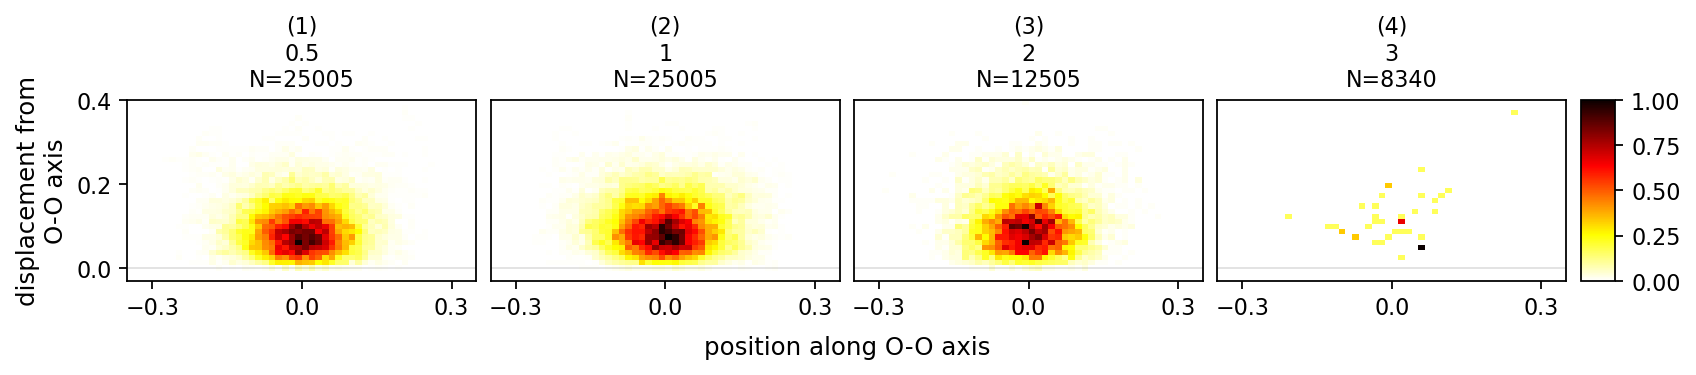

In [140]:
plot_hist([18, 15, 16, 17], labels=[0.5, 1, 2, 3]) # stepsize NVT 300

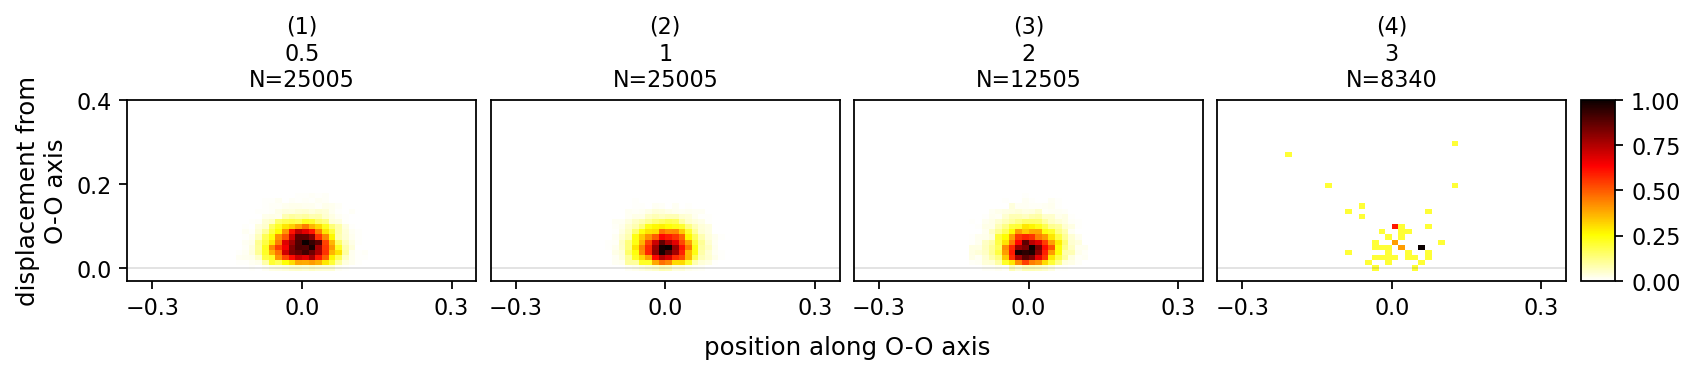

In [157]:
plot_hist([22, 19, 20, 21], labels=[0.5, 1, 2, 3]) # stepsize NVT 77

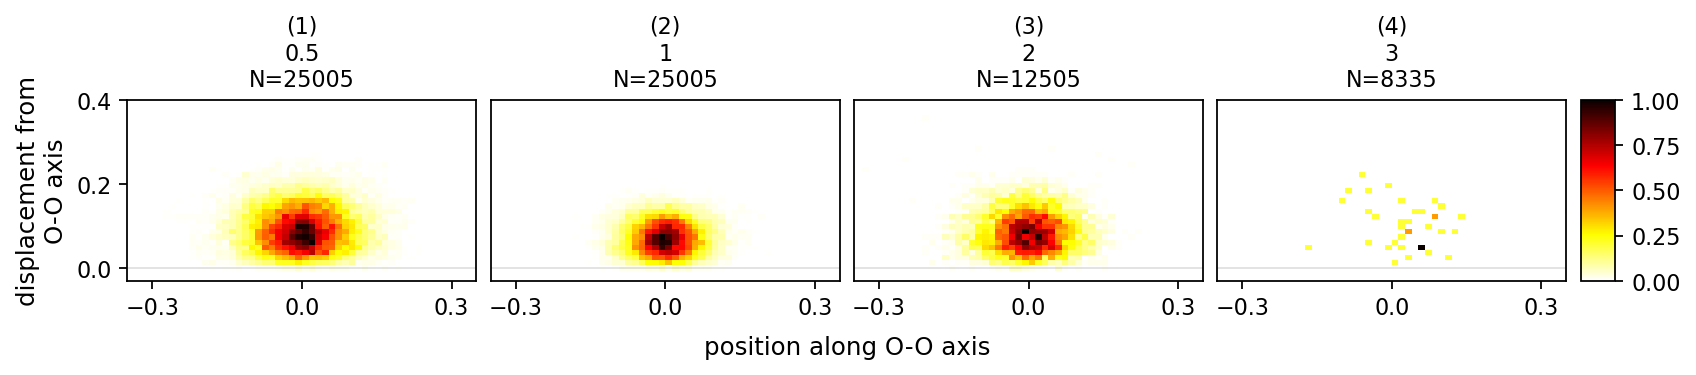

In [152]:
plot_hist([14, 10, 11, 12], labels=[0.5, 1, 2, 3]) # stepsize NVE

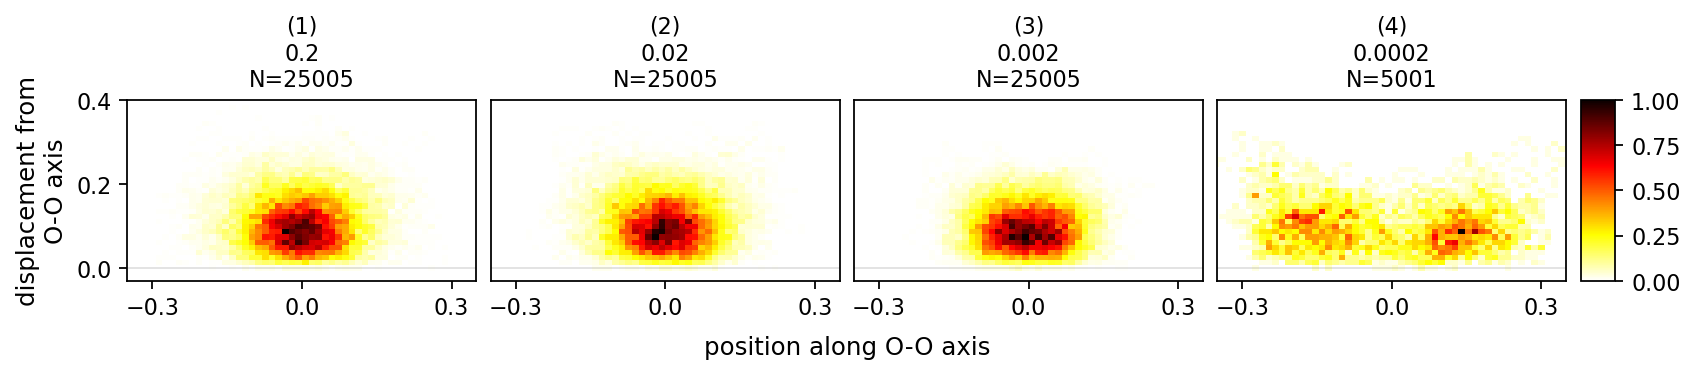

In [141]:
plot_hist([26, 27, 28, 29], labels=[0.2, 0.02, 0.002, 0.0002])  # friction coef

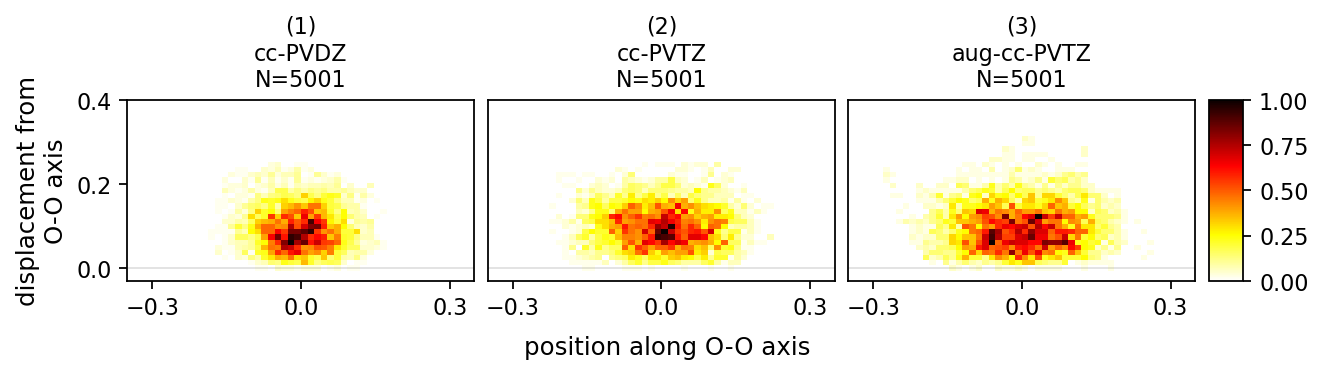

In [142]:
plot_hist([34, 23, 36], labels=['cc-PVDZ', 'cc-PVTZ', 'aug-cc-PVTZ'])  # psi4 - b3lyp - various basis sets

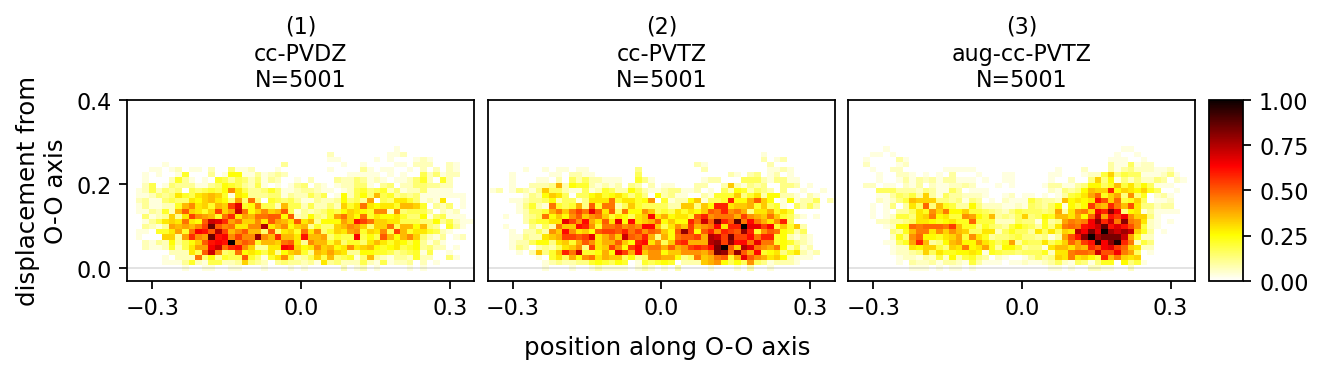

In [143]:
plot_hist([33, 30, 35], labels=['cc-PVDZ', 'cc-PVTZ', 'aug-cc-PVTZ']) # psi4 - hf - various basis sets

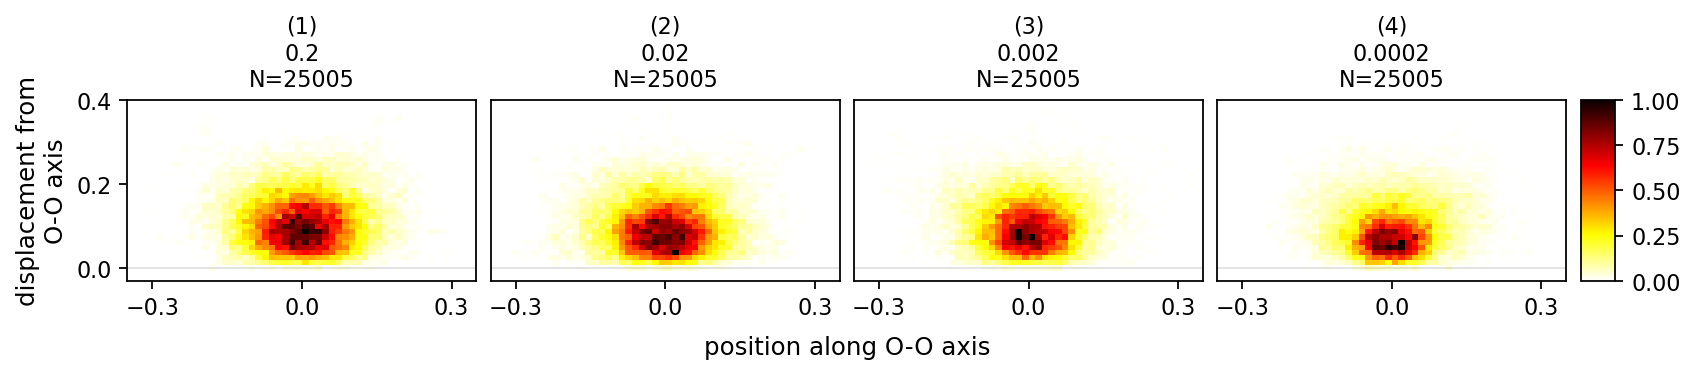

In [216]:
plot_hist([39,40,41,42], labels=[0.2, 0.02, 0.002, 0.0002]) # DFTB - step 0.5 - NVT 300

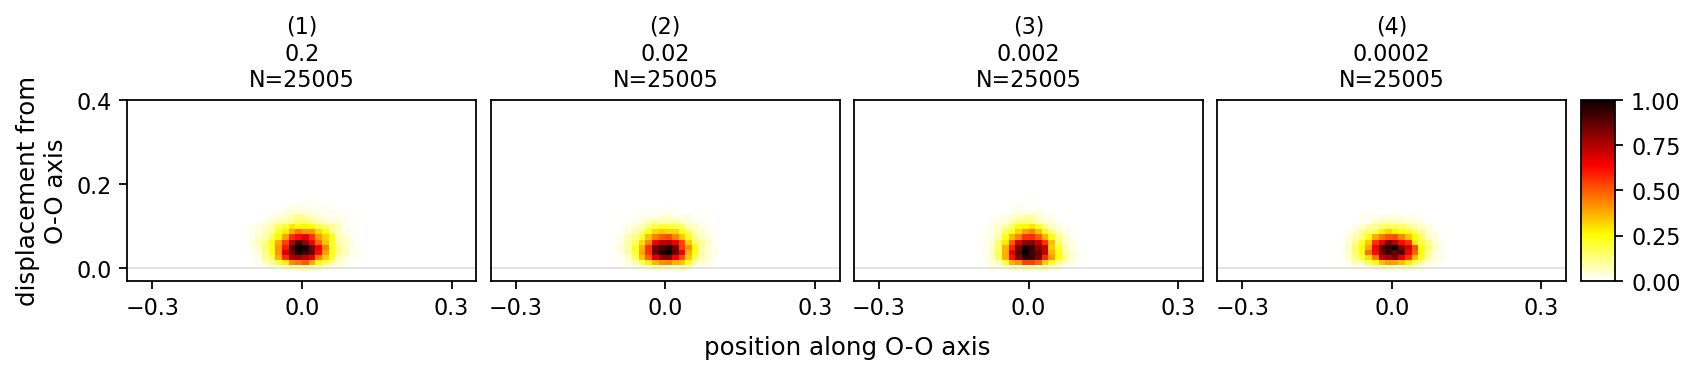

In [217]:
plot_hist([43, 44, 45, 46], labels=[0.2, 0.02, 0.002, 0.0002]) # DFTB - step 0.5 - NVT 77

In [321]:
ana_dir = "./simulation_028_cp2k/"
#ana_dir = "./simulation_025_orca/"
#ana_dir = "./simulation_031_psi4/"

times, E_tot, E_pot, E_kin = load_energies(ana_dir + "energies_000.log")
oxygen_ids = [0, 3]
shared_H_id = 4

ird = iread(ana_dir + "coords_transformed_000.traj", index=':')

ox1_pos = np.zeros(shape=(len(times),2))
ox2_pos = np.zeros(shape=(len(times),2))
shH_pos = np.zeros(shape=(len(times),2))

for i, frame in enumerate(ird):
    cell_center = frame.get_cell().sum(axis=0) / 2
    ox1, ox2, sH = frame.get_positions()[oxygen_ids+[shared_H_id]]
    
    ox1_pos[i] = ox1[[0,2]] -6
    ox2_pos[i] = ox2[[0,2]] -6
    shH_pos[i] = sH[[0,2]] -6

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]



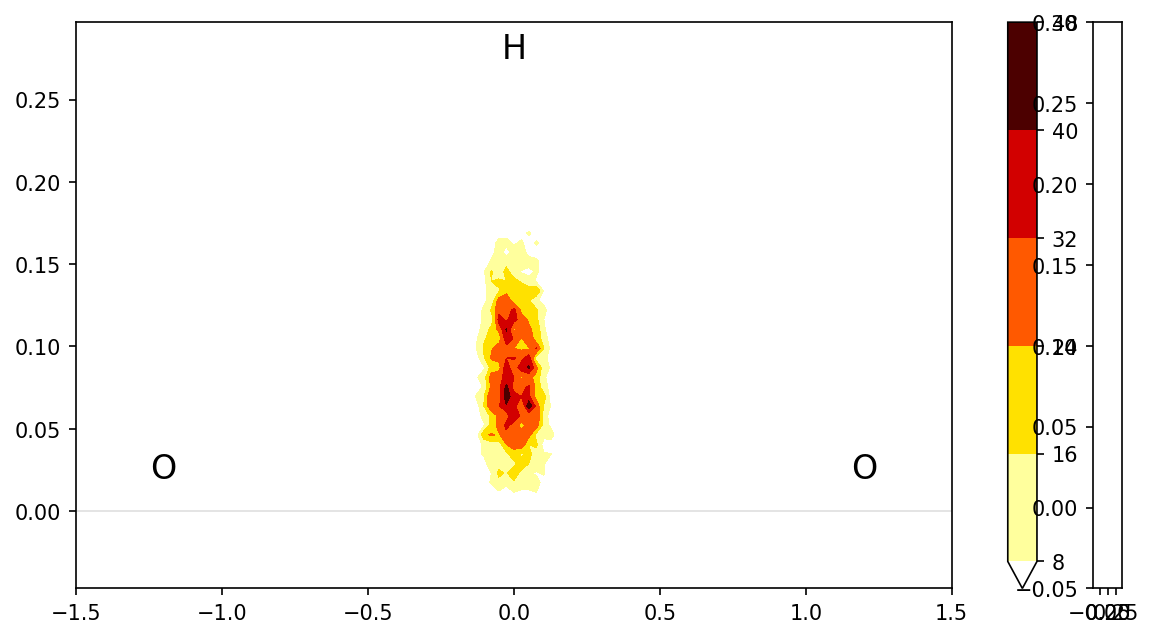

In [328]:
fig, ax = plt.subplots(num=None, figsize=(9,5), dpi=150, facecolor='w', edgecolor='k')

gs = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[30,1,1], figure=fig) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

kx = 35
ky = 60

#hist1 = ax0.hist2d(shH_pos.T[0], shH_pos.T[1], bins=[kx,ky], range=[[-0.45,0.45],[-0.05,0.3]], cmap='hot_r')
hdata = plt.hist2d(shH_pos.T[0], shH_pos.T[1], visible=False, bins=[kx,ky], range=[[-0.45,0.45],[-0.05,0.3]], )
xdata = (hdata[1][:-1] + hdata[1][1:]) / 2
ydata = (hdata[2][:-1] + hdata[2][1:]) / 2
hist1 = ax0.contourf(xdata, ydata, hdata[0].T, cmap='hot_r', levels=5, extend='min')

#hist2L = ax0.hist2d(ox1_pos.T[0], ox1_pos.T[1], bins=[kx,ky], range=[[-1.35,-0.45],[-0.05,0.3]],cmap='bone_r')
#hist2R = ax0.hist2d(ox2_pos.T[0], ox2_pos.T[1], bins=[kx,ky], range=[[0.45,1.35],[-0.05,0.3]],cmap='bone_r')
ax0.plot([-2,2], [0,0], c='k', linewidth=0.1)

ax0.set_xlim(-1.5,1.5)

plt.subplots_adjust(hspace=.5, wspace=0.18)

plt.colorbar(hist1, cax=ax1, orientation = 'vertical')
#plt.colorbar(hist2L[3], cax=ax2, orientation = 'vertical')

ax0.text(-1.2,0.02, "O", fontsize=16, horizontalalignment='center')
ax0.text(1.2,0.02, "O", fontsize=16, horizontalalignment='center')
ax0.text(0,0.275, "H", fontsize=16, horizontalalignment='center')

plt.show()

# **Analysis**- timing

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

0.034433633273345345
Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

0.043342011597680474
Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

0.03564283143371326
Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

0.03871417716456709


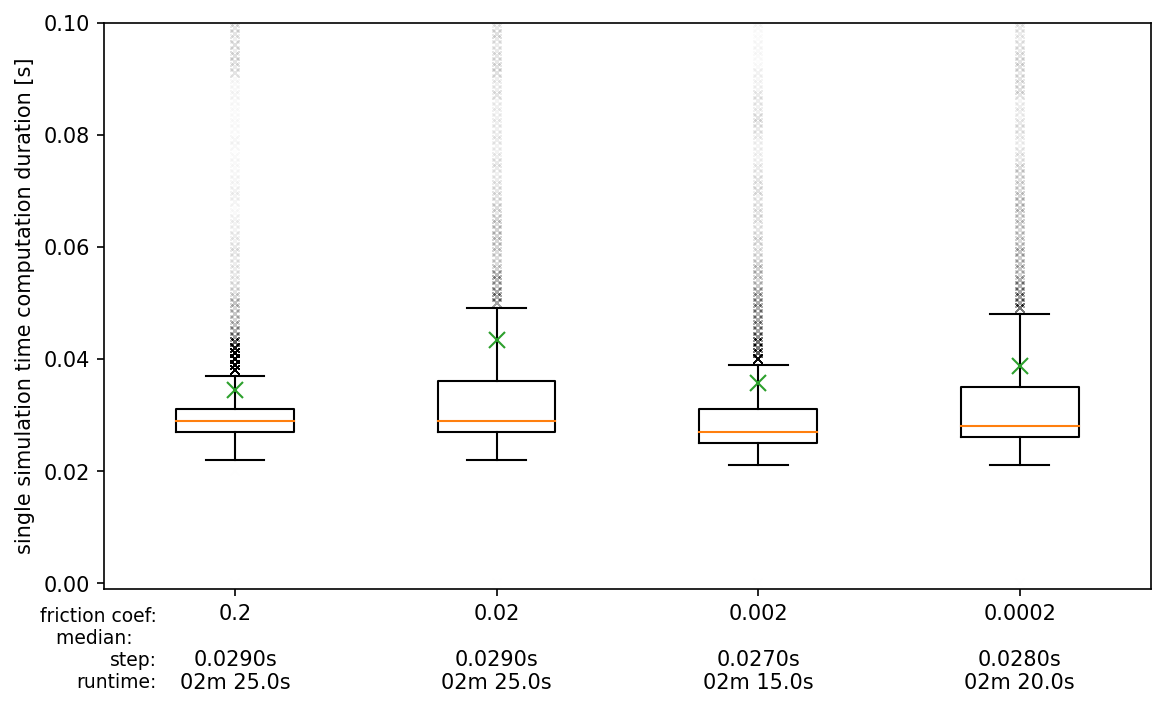

In [213]:
fig, ax = plt.subplots(num=None, figsize=(9,5), dpi=150, facecolor='w', edgecolor='k')

base_dir = "./simulation_{:03d}_{}/"

all_times = list()

indices = [26,27,32,28]
for i in indices:
    pth = base_dir.format(i, 'cp2k')
    times, E_tot, E_pot, E_kin = load_energies(pth+'energies_000.log')
    
    timings = np.zeros((5,len(times)))
    iter_times = np.zeros(5)
    n = 0
    m = 0
    
    with open(pth+'timings.txt', 'r') as file:
        for line in file:
            if '.' not in line:
                continue 
            dat = [x for x in line.split(' ') if len(x) > 1]
            lab, tm = str(dat[0]), float(dat[1])
            
            if lab == 'step':
                timings[m, n] = tm
                n += 1
            elif 'iter' in lab:
                iter_times[m] = tm
                m += 1
                n = 0
                
    all_times.append(np.concatenate(timings))
    #for i, it in enumerate(iter_times):
    #    plt.plot(times, timings[i], color=color[i], label=iter_times, linewidth=0.4)
    print(timings.mean())

bp = plt.boxplot(all_times, showmeans=True, flierprops={'color':'k','alpha':0.005,'marker':'x', 'fillstyle':'full','markersize':5})
    
for mn in bp['means']:
    mn.set(marker='x',color='r', markersize=8)
    
def to_time(number, H=False, M=True, decimals=1):
    hours = "{:02d}h ".format(int(number/3600)) if H else ""
    minutes = "{:02d}m ".format(int((number%3600)/60)) if M else ""
    seconds = str("{:02."+str(decimals)+"f}s").format(number%60)
    
    return hours+minutes+seconds

plt.ylim(-0.001, 0.1)
labels = [2e-1,2e-2,2e-3,2e-4]
plt.xticks(list(range(1, len(indices)+1)) , ["{}\n\n{}\n{}".format(x, to_time(y, M=False, decimals=4), to_time(5000*z)) for x,(y,z) in zip(labels, zip([i._xy[0,1] for i in bp['medians']], 
                                                                                                                [i._xy[0,1] for i in bp['medians']]))])
plt.ylabel('single simulation time computation duration [s]')

plt.text(0.7, -0.0186, 'friction coef:\nmedian:    \nstep:\nruntime:', horizontalalignment='right', fontsize=9)
plt.show()

Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

0.03564283143371326
Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

1.0871573685262947
Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

4.023549690061988
Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

6.573933413317337
Header: Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]

10.728801839632075


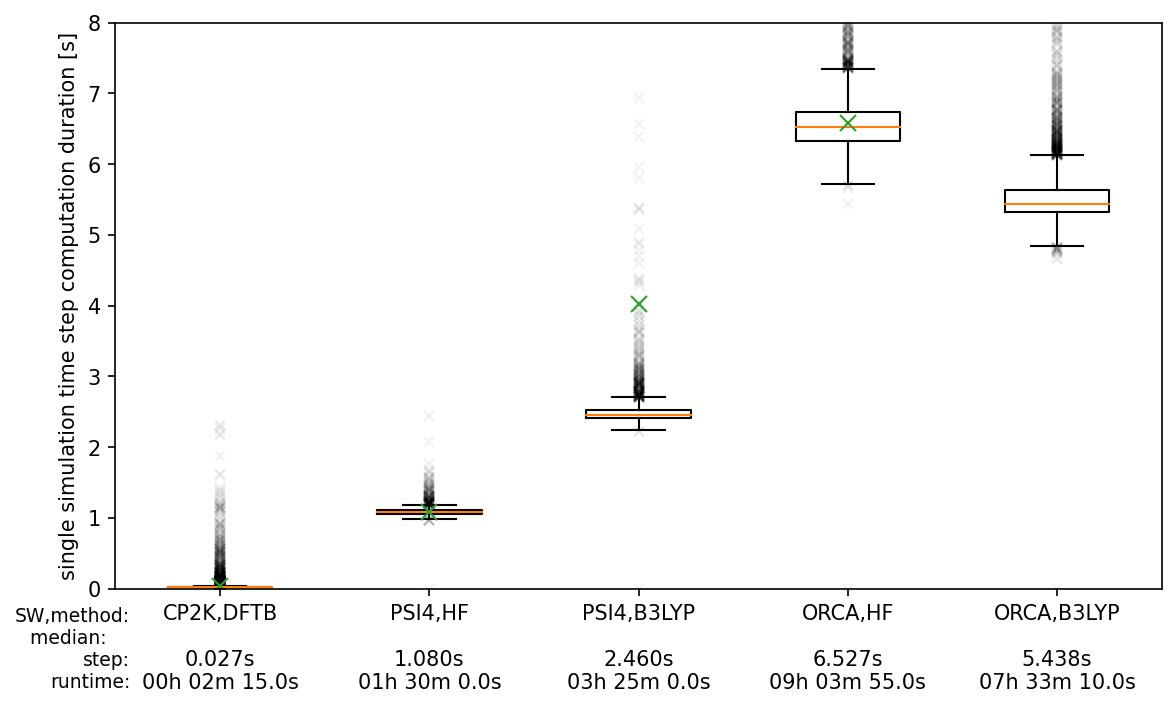

In [20]:
fig, ax = plt.subplots(num=None, figsize=(9,5), dpi=150, facecolor='w', edgecolor='k')

base_dir = "./simulation_{:03d}_{}/"

all_times = list()
indices = [32, 30, 31, 29, 25]

for i in indices:
    dname = [d for d in os.listdir("./") if "simulation_{:03d}_".format(i) in d][0]
    max_num = max([int(f.split('.')[0].split('_')[1]) for f in os.listdir("./{}/".format(dname)) if 'energies' in f])

    times, E_tot, E_pot, E_kin = load_energies(dname + '/energies_000.log')
    
    timings = np.zeros((max_num+1, len(times)))
    iter_times = np.zeros(max_num+1)
    n = 0
    m = 0
    
    with open(dname+'/timings.txt', 'r') as file:
        for line in file:
            if '.' not in line:
                continue 
            dat = [x for x in line.split(' ') if len(x) > 1]
            lab, tm = str(dat[0]), float(dat[1])
            
            if lab == 'step':
                timings[m, n] = tm
                n += 1
            elif 'iter' in lab:
                iter_times[m] = tm
                m += 1
                n = 0
                
    all_times.append(np.concatenate(timings))
    print(timings.mean())

bp = plt.boxplot(all_times, showmeans=True, flierprops={'color':'k','alpha':0.05,'marker':'x',
                                                    'fillstyle':'full','markersize':5})

for mn in bp['means']:
    mn.set(marker='x',color='r', markersize=8)

plt.ylim(-0.001, 8)
labels = ['CP2K,DFTB', 'PSI4,HF', 'PSI4,B3LYP', 'ORCA,HF', 'ORCA,B3LYP']
plt.xticks(list(range(1, len(indices)+1)) , ["{}\n\n{}\n{}".format(x, to_time(y, M=False, decimals=3), to_time(5000*z, H=True)) for x,(y,z) in zip(labels, zip([i._xy[0,1] for i in bp['medians']], 
                                                                                                                [i._xy[0,1] for i in bp['medians']]))])
plt.ylabel('single simulation time step computation duration [s]')
plt.text(0.57, -1.39, 'SW,method:\nmedian:    \nstep:\nruntime:', horizontalalignment='right', fontsize=9)

plt.show()